# Análise exploratória

O objetivo deste notebook é explorar a regressão múltipla e engenharia de atributos com as funções da API Scikit-learn.

Neste notebook você irá manipular dados de transações imobiliárias de King County para prever preços usando regressão múltipla. Desta forma, você poderá:
* Usar Pandas DataFrames para realizar algumas atividades de engenharia de atributos
* Usar funções do Scikit-learn para computar os coeficientes de regressão (pesos/parâmetros)
* Dados os coeficientes de regressão, os preditores e a saída (preços), criar uma função para computar erro utilizando a técnica de mínimos quadrados (Residual Sum of Squares).
* Visualizar os coeficientes e interpretar seus significados

## Importação das bibliotecas

In [1]:
!pip install xgboost
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.4 MB/s eta 0:00:00


Importação de bibliotecas necessárias para a execução dos comandos:
* Pandas: para manipulação dos dados
* Numpy: para compatibilizar o uso de dados por algumas funções
* Datetime: para formatar um dos atributos da base de dados
* Sklearn: para uso comparativo de funções de regressão linear

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from numpy import mean
from numpy import std
from IPython.display import Image, display

In [ ]:
from datetime import datetime

### Leitura dos dados

O dataset contém dados de transações imobiliárias de King County, região aonde está a cidade de Seattle, USA.

In [3]:
sales = pd.read_csv("kc_house_data.csv")

## Análise Exploratória dos Dados - Exploratory Data Analysis (EDA) e Pré-processamento

In [4]:
sales.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Verificação de quantos objetos contém valor igual a ZERO para cada um dos parâmetros

* 4 variáveis com muitos dados com valor igual a zero. Analisando a legenda do dataset isso faz sentido para waterfront e view. Para ano de renovação significa que não foi renovado e para sqft_basement que não possui.

In [ ]:
(sales[sales[sales.columns] == 0]).count()

id                   0
date                 0
price                0
bedrooms            13
bathrooms           10
sqft_living          0
sqft_lot             0
floors               0
waterfront       21450
view             19489
condition            0
grade                0
sqft_above           0
sqft_basement    13126
yr_built             0
yr_renovated     20699
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [ ]:
# Função para converter string para datetime
def converter_para_datetime(date):
    return datetime.strptime(date, "%Y%m%dT%H%M%S")

# Aplicar a função à coluna do DataFrame
sales['data_formatada'] = sales['date'].apply(converter_para_datetime)
sales = sales.drop(columns=['date'])


#### Duplicatas

In [ ]:
#Olhando as duplicatas
print(sales.duplicated().any())
num_duplicatas = sales.duplicated().sum()
print("Número de duplicatas:", num_duplicatas)


False
Número de duplicatas: 0


In [ ]:
duplicatas_ID = sales.duplicated('id', keep=False)
ID_duplicatas = sales[duplicatas_ID].groupby('id').filter(lambda x: len(x) > 1)
ID_duplicatas


id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
93     6021501535   430000.0         3       1.50         1580      5000   
94     6021501535   700000.0         3       1.50         1580      5000   
313    4139480200  1384000.0         4       3.25         4290     12103   
314    4139480200  1400000.0         4       3.25         4290     12103   
324    7520000520   232000.0         2       1.00         1240     12092   
...           ...        ...       ...        ...          ...       ...   
20670  8564860270   502000.0         4       2.50         2680      5539   
20779  6300000226   240000.0         4       1.00         1200      2171   
20780  6300000226   380000.0         4       1.00         1200      2171   
21580  7853420110   594866.0         3       3.00         2780      6000   
21581  7853420110   625000.0         3       3.00         2780      6000   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
93        1.0           0     0          3  ...        1290            290   
94        1.0           0     0          3  ...        1290            290   
313       1.0           0     3          3  ...        2690           1600   
314       1.0           0     3          3  ...        2690           1600   
324       1.0           0     0          3  ...         960            280   
...       ...         ...   ...        ...  ...         ...            ...   
20670     2.0           0     0          3  ...        2680              0   
20779     1.5           0     0          3  ...        1200              0   
20780     1.5           0     0          3  ...        1200              0   
21580     2.0           0     0          3  ...        2780              0   
21581     2.0           0     0          3  ...        2780              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
93         1939             0    98117  47.6870 -122.386           1570   
94         1939             0    98117  47.6870 -122.386           1570   
313        1997             0    98006  47.5503 -122.102           3860   
314        1997             0    98006  47.5503 -122.102           3860   
324        1922          1984    98146  47.4957 -122.352           1820   
...         ...           ...      ...      ...      ...            ...   
20670      2013             0    98045  47.4759 -121.734           2680   
20779      1933             0    98133  47.7076 -122.342           1130   
20780      1933             0    98133  47.7076 -122.342           1130   
21580      2013             0    98065  47.5184 -121.886           2850   
21581      2013             0    98065  47.5184 -121.886           2850   

       sqft_lot15  data_formatada  
93           4500      2014-07-25  
94           4500      2014-12-23  
313         11244      2014-06-18  
314         11244      2014-12-09  
324          7460      2014-09-05  
...           ...             ...  
20670        5992      2015-03-30  
20779        1598      2014-06-26  
20780        1598      2015-05-04  
21580        6000      2014-10-03  
21581        6000      2015-05-04  

[353 rows x 21 columns]

In [ ]:
# organizar
df_duplicatas = ID_duplicatas.sort_values(by=['id', 'data_formatada'])

# Calcular a diferença de preço entre vendas consecutivas para o mesmo 'id'
df_duplicatas['dif_preco'] = df_duplicatas.groupby('id')['price'].diff()

# Calcular a diferença de tempo entre vendas consecutivas para o mesmo 'id'
df_duplicatas['dif_tempo_dias'] = df_duplicatas.groupby('id')['data_formatada'].diff().dt.days.astype('Int64')

# Exibir o DataFrame resultante
df_duplicatas


id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
2496      1000102  280000.0         6       3.00         2400      9373   
2497      1000102  300000.0         6       3.00         2400      9373   
16814     7200179  150000.0         2       1.00          840     12750   
16815     7200179  175000.0         2       1.00          840     12750   
11433   109200390  245000.0         3       1.75         1480      3900   
...           ...       ...       ...        ...          ...       ...   
6346   9828200460  430000.0         2       1.00          700      4800   
15199  9834200305  350000.0         3       1.00         1790      3876   
15200  9834200305  615000.0         3       1.00         1790      3876   
1085   9834200885  360000.0         4       2.50         2080      4080   
1086   9834200885  550000.0         4       2.50         2080      4080   

       floors  waterfront  view  condition  ...  yr_built  yr_renovated  \
2496      2.0           0     0          3  ...      1991             0   
2497      2.0           0     0          3  ...      1991             0   
16814     1.0           0     0          3  ...      1925             0   
16815     1.0           0     0          3  ...      1925             0   
11433     1.0           0     0          4  ...      1980             0   
...       ...         ...   ...        ...  ...       ...           ...   
6346      1.0           0     0          3  ...      1922             0   
15199     1.5           0     0          5  ...      1904             0   
15200     1.5           0     0          5  ...      1904             0   
1085      1.0           0     0          5  ...      1962             0   
1086      1.0           0     0          5  ...      1962             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  data_formatada  \
2496     98002  47.3262 -122.214           2060        7316      2014-09-16   
2497     98002  47.3262 -122.214           2060        7316      2015-04-22   
16814    98055  47.4840 -122.211           1480        6969      2014-10-16   
16815    98055  47.4840 -122.211           1480        6969      2015-04-24   
11433    98023  47.2977 -122.367           1830        6956      2014-08-20   
...        ...      ...      ...            ...         ...             ...   
6346     98122  47.6147 -122.300           1440        4800      2015-01-06   
15199    98144  47.5750 -122.288           1360        4080      2014-07-16   
15200    98144  47.5750 -122.288           1360        4080      2015-02-10   
1085     98144  47.5720 -122.290           1340        4080      2014-07-17   
1086     98144  47.5720 -122.290           1340        4080      2015-04-20   

       dif_preco  dif_tempo_dias  
2496         NaN            <NA>  
2497     20000.0             218  
16814        NaN            <NA>  
16815    25000.0             190  
11433        NaN            <NA>  
...          ...             ...  
6346    170000.0             193  
15199        NaN            <NA>  
15200   265000.0             209  
1085         NaN            <NA>  
1086    190000.0             277  

[353 rows x 23 columns]

In [ ]:
(df_duplicatas['id'] > 2).any()

True

ou seja, existem casas vendidas mais de 2 vezes

In [ ]:
contagem_valores = df_duplicatas['id'].value_counts()


# Obter os ids que aparecem mais de 2 vezes
ids_repetidos = contagem_valores[contagem_valores > 2].index.tolist()

# Filtrar o DataFrame para obter as linhas com os ids repetidos
df_duplicatas[df_duplicatas['id'].isin(ids_repetidos)]




id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
17602  795000620  115000.0         3        1.0         1080      6250   
17603  795000620  124000.0         3        1.0         1080      6250   
17604  795000620  157000.0         3        1.0         1080      6250   

       floors  waterfront  view  condition  ...  yr_built  yr_renovated  \
17602     1.0           0     0          2  ...      1950             0   
17603     1.0           0     0          2  ...      1950             0   
17604     1.0           0     0          2  ...      1950             0   

       zipcode      lat    long  sqft_living15  sqft_lot15  data_formatada  \
17602    98168  47.5045 -122.33           1070        6250      2014-09-24   
17603    98168  47.5045 -122.33           1070        6250      2014-12-15   
17604    98168  47.5045 -122.33           1070        6250      2015-03-11   

       dif_preco  dif_tempo_dias  
17602        NaN            <NA>  
17603     9000.0              82  
17604    33000.0              86  

[3 rows x 23 columns]

Ou seja, existem 176 IDs repetidos.
A casa com id 795000620 foi vendida 3 vezes


In [ ]:
novo_df = df_duplicatas[['id','price','dif_preco','dif_tempo_dias']]
agrupado = novo_df.groupby("id").mean()
agrupado.sort_values(by='dif_preco', ascending=False)


price  dif_preco  dif_tempo_dias
id                                              
6021500970   609975.0   529950.0           314.0
7977201065   545000.0   390000.0           121.0
7409700215   735750.0   371500.0           280.0
4443800385   594050.0   368100.0           261.0
2568300045   477475.0   344950.0           267.0
...               ...        ...             ...
8682262400   424975.0   -10050.0           299.0
2767603612   494500.0   -11000.0           246.0
4139420590  1206250.0   -12500.0            99.0
2726049071   499975.0   -20050.0           118.0
7167000040   720000.0   -40000.0           204.0

[176 rows x 3 columns]

In [ ]:
filtro_id=df_duplicatas['id'] == 6021500970
display(df_duplicatas[filtro_id])

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
19335  6021500970  345000.0         2        1.0         1080      4000   
19336  6021500970  874950.0         2        1.0         1080      4000   

       floors  waterfront  view  condition  ...  yr_built  yr_renovated  \
19335     1.0           0     0          3  ...      1940             0   
19336     1.0           0     0          3  ...      1940             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  data_formatada  \
19335    98117  47.6902 -122.387           1530        4240      2014-05-28   
19336    98117  47.6902 -122.387           1530        4240      2015-04-07   

       dif_preco  dif_tempo_dias  
19335        NaN            <NA>  
19336   529950.0             314  

[2 rows x 23 columns]

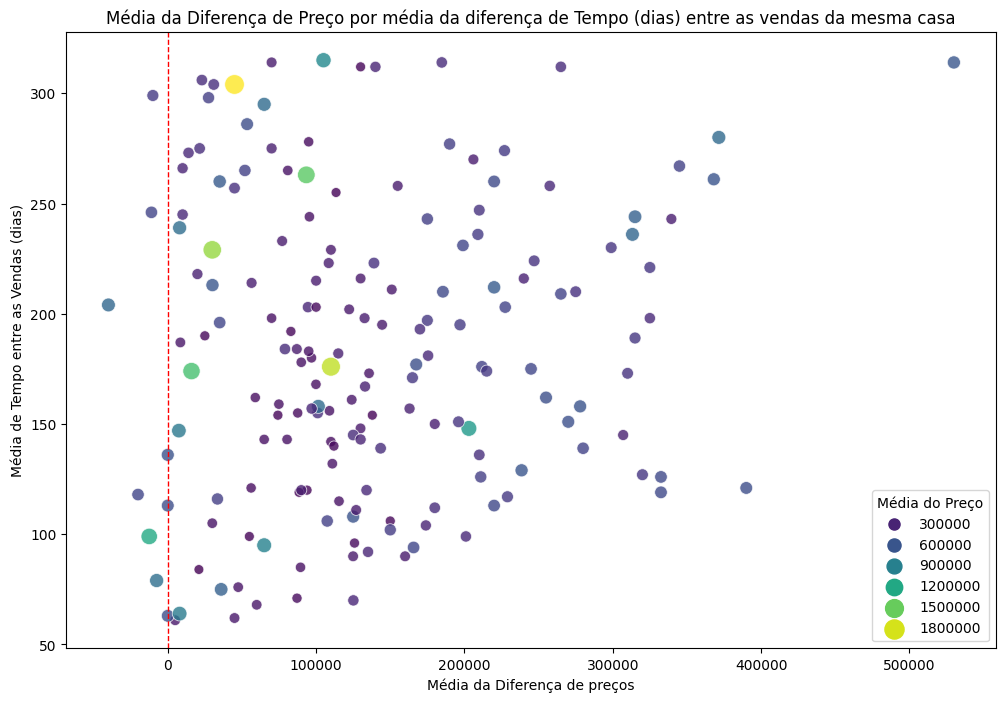

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=agrupado['dif_preco'], y=agrupado['dif_tempo_dias'], size=agrupado['price'], hue=agrupado['price'],sizes=(50, 200), palette='viridis', alpha=0.8)

# Ajustes de visualização
plt.xlabel('Média da Diferença de preços')
plt.ylabel('Média de Tempo entre as Vendas (dias)')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.title('Média da Diferença de Preço por média da diferença de Tempo (dias) entre as vendas da mesma casa')
plt.legend(title='Média do Preço')
plt.show()

### Filtrando o ano de renovação com os valores diferentes de 0

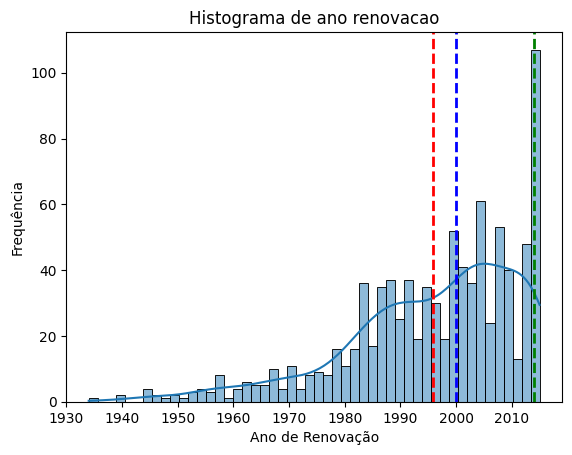

In [ ]:
filtered_sales = sales[sales['yr_renovated'] != 0]
sns.histplot(filtered_sales['yr_renovated'], bins=50, edgecolor='black',kde=True)
mean_value = filtered_sales['yr_renovated'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Média')
median_value = filtered_sales['yr_renovated'].median()
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Mediana')

mode_value = filtered_sales['yr_renovated'].mode().iloc[0]
plt.axvline(mode_value, color='green', linestyle='dashed', linewidth=2, label='Mediana')

plt.title('Histograma de ano renovacao')
plt.xlabel('Ano de Renovação')

plt.ylabel('Frequência')

plt.savefig('histograma_renovacao_.png', bbox_inches='tight')

plt.show()

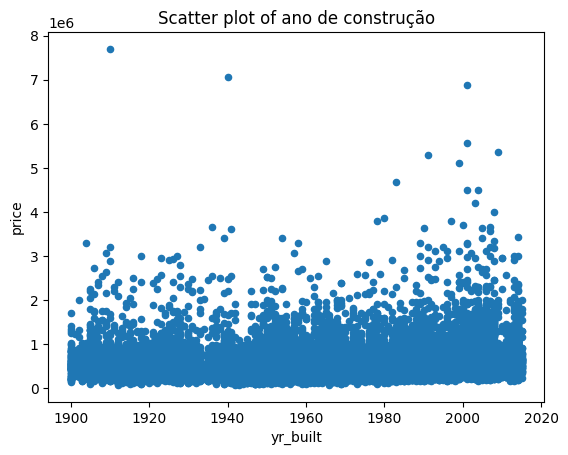

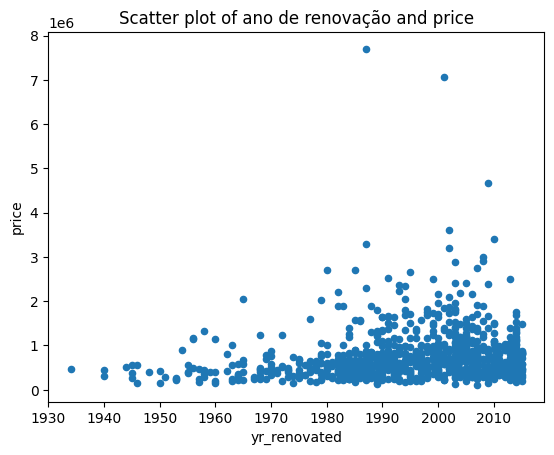

In [ ]:
sales.plot.scatter(x='yr_built', y='price', title= 'Scatter plot of ano de construção');
plt.savefig('yr_built_price.png', bbox_inches='tight')
plt.show()
filtered_sales.plot.scatter(x='yr_renovated', y='price', title= 'Scatter plot of ano de renovação and price');
plt.savefig('yr_renovated_price.png', bbox_inches='tight')
plt.show()

Esses gráficos mostram que as casas mais caras são mais antigas, mas foram renovadas. Abaixo essa consulta é feita no dataframe

### Maiores preços e casas

In [ ]:
filtro_preco_maior_6milhoes = sales['price'] > 6000000
print("CASAS COM VALORES MAIORES QUE 6 MILHOES")
display(sales[filtro_preco_maior_6milhoes])

filtro_areas_grandes = sales['sqft_living'] >10000
print("--CASAS COM SQFT LIVING MAIOR QUE 10 MIL --")
display(sales[filtro_areas_grandes])

filtro_lot_grandes = sales['sqft_lot'] >900000
print("--CASAS COM SQFT LOT MAIOR QUE 900 MIL--")
display(sales[filtro_lot_grandes])

filtro_preco_maior_1M = (sales['price'] > 1000000).sum()
print(f'O número de casas com preço maior que 1 milhão é: {filtro_preco_maior_1M}')

filtro_sqft_lot_15 = sales['sqft_lot15'] > 400000
print("--MAIORES sqft_lot15--")
display(sales[filtro_sqft_lot_15])





CASAS COM VALORES MAIORES QUE 6 MILHOES


id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
3914  9808700762  7062500.0         5       4.50        10040     37325   
7252  6762700020  7700000.0         6       8.00        12050     27600   
9254  9208900037  6885000.0         6       7.75         9890     31374   

      floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
3914     2.0           1     2          3  ...        7680           2360   
7252     2.5           0     3          4  ...        8570           3480   
9254     2.0           0     4          3  ...        8860           1030   

      yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
3914      1940          2001    98004  47.6500 -122.214           3930   
7252      1910          1987    98102  47.6298 -122.323           3940   
9254      2001             0    98039  47.6305 -122.240           4540   

      sqft_lot15  data_formatada  
3914       25449      2014-06-11  
7252        8800      2014-10-13  
9254       42730      2014-09-19  

[3 rows x 21 columns]

--CASAS COM SQFT LIVING MAIOR QUE 10 MIL --


id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
3914   9808700762  7062500.0         5        4.5        10040     37325   
7252   6762700020  7700000.0         6        8.0        12050     27600   
12777  1225069038  2280000.0         7        8.0        13540    307752   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
3914      2.0           1     2          3  ...        7680           2360   
7252      2.5           0     3          4  ...        8570           3480   
12777     3.0           0     4          3  ...        9410           4130   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
3914       1940          2001    98004  47.6500 -122.214           3930   
7252       1910          1987    98102  47.6298 -122.323           3940   
12777      1999             0    98053  47.6675 -121.986           4850   

       sqft_lot15  data_formatada  
3914        25449      2014-06-11  
7252         8800      2014-10-13  
12777      217800      2014-05-05  

[3 rows x 21 columns]

--CASAS COM SQFT LOT MAIOR QUE 900 MIL--


id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1719   1020069017   700000.0         4       1.00         1300   1651359   
3949    722069232   998000.0         4       3.25         3770    982998   
4441   3626079040   790000.0         2       3.00         2560    982278   
6691   2624089007  1998000.0         2       2.50         3900    920423   
7647   2623069031   542500.0         5       3.25         3010   1074218   
7769   2323089009   855000.0         4       3.50         4030   1024068   
17319  3326079016   190000.0         2       1.00          710   1164794   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
1719      1.0           0     3          4  ...        1300              0   
3949      2.0           0     0          3  ...        3770              0   
4441      1.0           0     0          3  ...        2560              0   
6691      2.0           0     0          3  ...        3900              0   
7647      1.5           0     0          5  ...        2010           1000   
7769      2.0           0     0          3  ...        4030              0   
17319     1.0           0     0          2  ...         710              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
1719       1920             0    98022  47.2313 -122.023           2560   
3949       1992             0    98058  47.4140 -122.087           2290   
4441       2004             0    98014  47.6955 -121.861           1620   
6691       2009             0    98065  47.5371 -121.756           2720   
7647       1931             0    98027  47.4564 -122.004           2450   
7769       2006             0    98045  47.4619 -121.744           1830   
17319      1915             0    98014  47.6888 -121.909           1680   

       sqft_lot15  data_formatada  
1719       425581      2015-03-27  
3949        37141      2014-09-05  
4441        40946      2014-07-30  
6691       411962      2015-03-20  
7647        68825      2014-05-21  
7769        11700      2015-01-19  
17319       16730      2015-05-04  

[7 rows x 21 columns]

O número de casas com preço maior que 1 milhão é: 1465
--MAIORES sqft_lot15--


id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1719   1020069017   700000.0         4       1.00         1300   1651359   
3801   1550000463   637000.0         4       3.50         3080    118918   
6691   2624089007  1998000.0         2       2.50         3900    920423   
8664   3226079059   549950.0         3       1.75         2930    266587   
9714    225079036   937500.0         4       4.00         5545    871200   
13464  3420069060   790000.0         3       2.50         2640    432036   
19156  1020069042   858000.0         4       3.50         4370    422967   
20452  1125079111  1600000.0         4       5.50         6530    871200   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
1719      1.0           0     3          4  ...        1300              0   
3801      2.0           0     0          3  ...        3080              0   
6691      2.0           0     0          3  ...        3900              0   
8664      2.0           0     0          3  ...        2440            490   
9714      2.0           0     0          3  ...        3605           1940   
13464     1.5           0     3          3  ...        2640              0   
19156     1.0           0     2          4  ...        2580           1790   
20452     2.0           0     2          3  ...        6530              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
1719       1920             0    98022  47.2313 -122.023           2560   
3801       2008             0    98019  47.7721 -121.924           1830   
6691       2009             0    98065  47.5371 -121.756           2720   
8664       1995             0    98014  47.6991 -121.947           2700   
9714       2003             0    98014  47.6760 -121.882           3420   
13464      1996             0    98022  47.1795 -122.036           1500   
19156      1978             0    98022  47.2332 -122.029           3260   
20452      2008             0    98014  47.6640 -121.878           1280   

       sqft_lot15  data_formatada  
1719       425581      2015-03-27  
3801       434728      2014-08-26  
6691       411962      2015-03-20  
8664       438213      2014-10-19  
9714       871200      2015-01-07  
13464      560617      2014-11-07  
19156      422967      2014-10-01  
20452      858132      2015-04-15  

[8 rows x 21 columns]

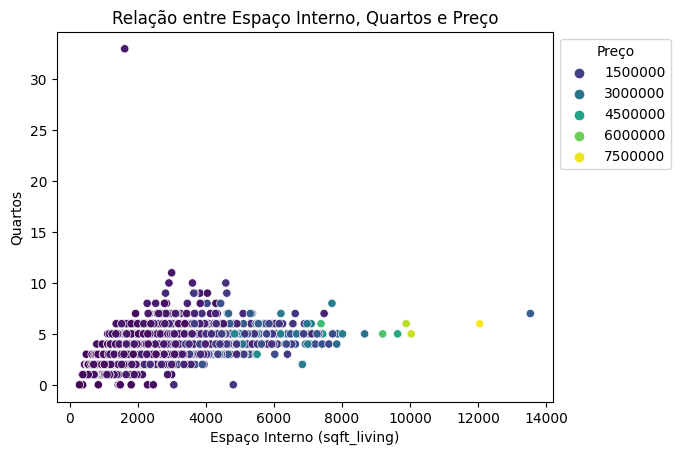

In [ ]:
sns.scatterplot(x='sqft_living', y='bedrooms', hue='price', palette='viridis', data=sales)
plt.title('Relação entre Espaço Interno, Quartos e Preço')
plt.xlabel('Espaço Interno (sqft_living)')
plt.ylabel('Quartos')
plt.legend(title='Preço',bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

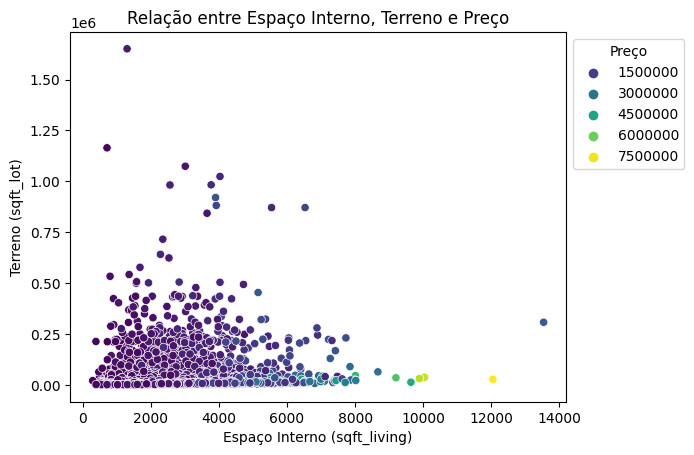

In [ ]:
#Relação espaço interno e terreno
sns.scatterplot(x='sqft_living', y='sqft_lot', hue='price', palette='viridis', data=sales)
plt.title('Relação entre Espaço Interno, Terreno e Preço')
plt.xlabel('Espaço Interno (sqft_living)')
plt.ylabel('Terreno (sqft_lot)')
plt.legend(title='Preço',bbox_to_anchor=(1.0, 1), loc='upper left')
plt.savefig('terreno_living.png', bbox_inches='tight')
plt.show()

Assimetria e curtose

In [ ]:
assimetria_serie=sales.skew()
assimetria_df = pd.DataFrame({'Assimetria': assimetria_serie})
curtose_series=sales.kurtosis()
resultado_df = assimetria_df.assign(Curtose=curtose_series)
resultado_df


<ipython-input-26-4b1771a28eb9>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  assimetria_serie=sales.skew()
<ipython-input-26-4b1771a28eb9>:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  curtose_series=sales.kurtosis()


Assimetria     Curtose
id               0.243329   -1.260542
price            4.024069   34.585540
bedrooms         1.974300   49.063653
bathrooms        0.511108    1.279902
sqft_living      1.471555    5.243093
sqft_lot        13.060019  285.077820
floors           0.616177   -0.484723
waterfront      11.385108  127.632494
view             3.395750   10.893022
condition        1.032805    0.525764
grade            0.771103    1.190932
sqft_above       1.446664    3.402304
sqft_basement    1.577965    2.715574
yr_built        -0.469805   -0.657408
yr_renovated     4.549493   18.701152
zipcode          0.405661   -0.853479
lat             -0.485270   -0.676313
long             0.885053    1.049501
sqft_living15    1.108181    1.597096
sqft_lot15       9.506743  150.763110

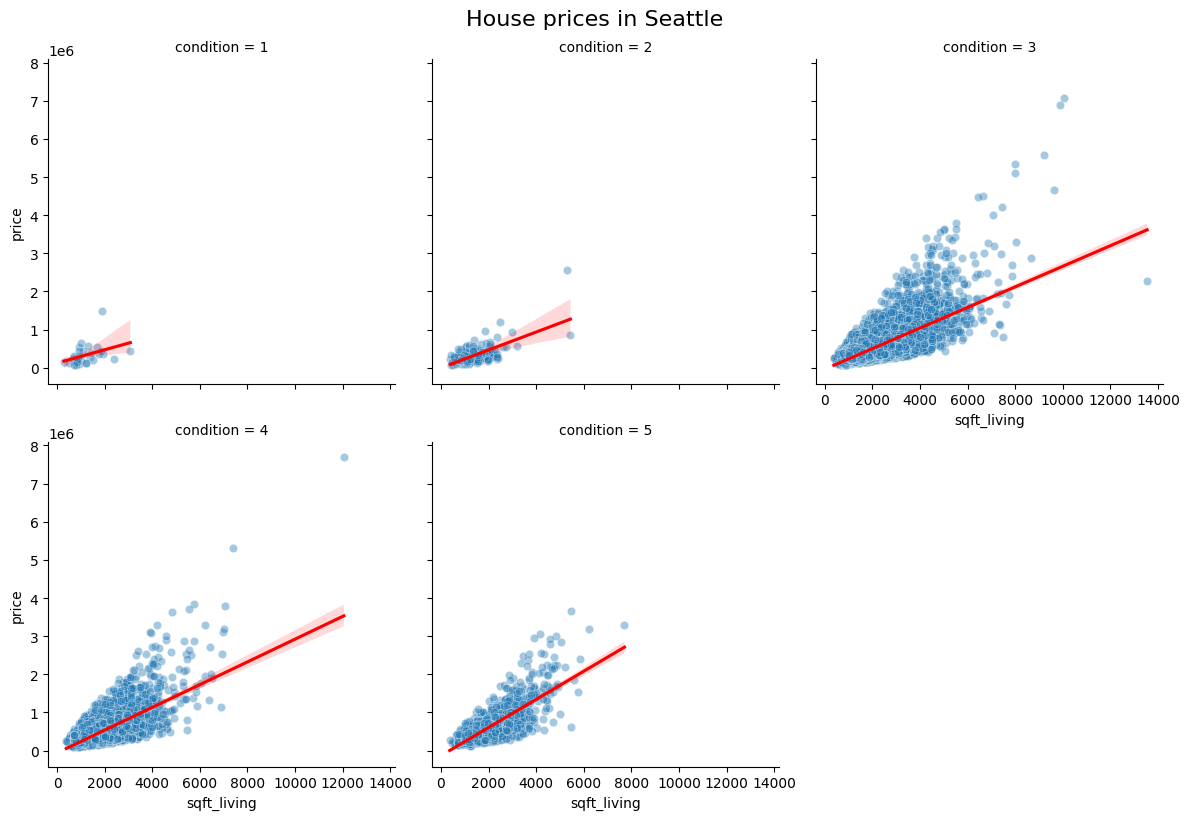

In [ ]:
g = sns.FacetGrid(sales, col='condition', col_wrap=3, height=4)
g.map(sns.scatterplot, 'sqft_living', 'price', alpha=0.4)
g.map(sns.regplot, 'sqft_living', 'price', scatter=False, color='red')
g.set_axis_labels('sqft_living', 'price')
g.fig.suptitle('House prices in Seattle', fontsize=16, y=1.02)


plt.show()

#### Verificação de quantos valores únicos cada atributo possui
Esta verificação foi realizada para se ter uma visão geral dos intervalos de valores que cada atributo apresenta.

In [ ]:
sales.nunique()

#### Visualização de únicos:

In [ ]:
unicos_bath = sales['bathrooms'].unique()
banheiros=unicos_bath.astype(str)
print("Banheiros : ",banheiros)
unicos_view = sales['view'].unique()
view=unicos_view.astype(str)
print("view: ",view)
unicos_condition = sales['condition'].unique()
condition=unicos_condition.astype(str)
print("Condition: ",condition)
unicos_grade = sales['grade'].unique()
grade=unicos_grade.astype(str)
print("Grade: ",grade)
unicos_zip= sales['zipcode'].unique()
zipcode=unicos_zip.astype(str)
print("Zipcode: ",zipcode)
unicos_waterfront = sales['waterfront'].unique()
waterfront=unicos_waterfront.astype(str)
print("Waterfront: ",waterfront)



Banheiros :  ['1.0' '2.25' '3.0' '2.0' '4.5' '1.5' '2.5' '1.75' '2.75' '3.25' '4.0'
 '3.5' '0.75' '4.75' '5.0' '4.25' '3.75' '0.0' '1.25' '5.25' '6.0' '0.5'
 '5.5' '6.75' '5.75' '8.0' '7.5' '7.75' '6.25' '6.5']
view:  ['0' '3' '4' '2' '1']
Condition:  ['3' '5' '4' '1' '2']
Grade:  ['7' '6' '8' '11' '9' '5' '10' '12' '4' '3' '13' '1']
Zipcode:  ['98178' '98125' '98028' '98136' '98074' '98053' '98003' '98198' '98146'
 '98038' '98007' '98115' '98107' '98126' '98019' '98103' '98002' '98133'
 '98040' '98092' '98030' '98119' '98112' '98052' '98027' '98117' '98058'
 '98001' '98056' '98166' '98023' '98070' '98148' '98105' '98042' '98008'
 '98059' '98122' '98144' '98004' '98005' '98034' '98075' '98116' '98010'
 '98118' '98199' '98032' '98045' '98102' '98077' '98108' '98168' '98177'
 '98065' '98029' '98006' '98109' '98022' '98033' '98155' '98024' '98011'
 '98031' '98106' '98072' '98188' '98014' '98055' '98039']
Waterfront:  ['0' '1']


### Gráficos

#### Distribuição dos preços pela localização

<Axes: title={'center': 'Preços por localização'}, xlabel='long', ylabel='lat'>

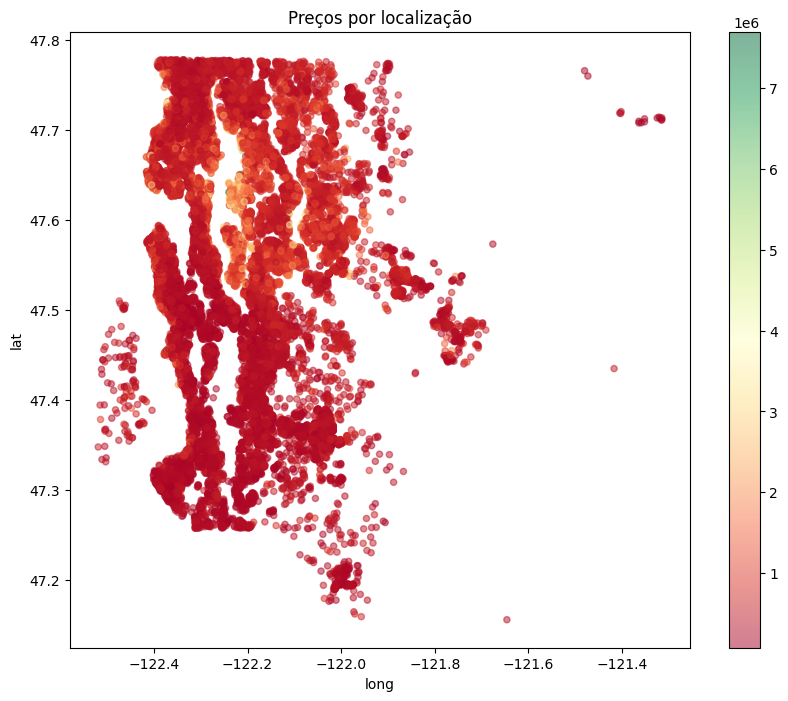

In [ ]:
sales.plot.scatter(y='lat',x='long',c=sales['price'],cmap ='RdYlGn',
                   alpha=0.5, figsize=(10,8),title = "Preços por localização")

Para melhor visualização, outro gráfico foi criado, usando hexbin, que faz a média dos valores do preço dividindo a area em  50x50 hexágonos

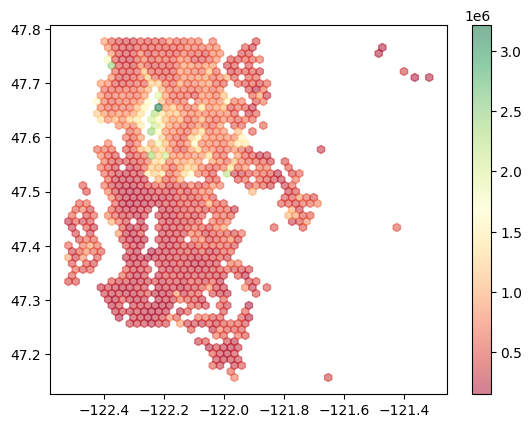

In [ ]:
hb =plt.hexbin(x=sales['long'], y=sales['lat'], C=sales['price'], gridsize=50, cmap='RdYlGn', alpha=0.5)
plt.colorbar()


#### Mapa do condado
Visualização do mapa da região para comparação


In [ ]:
display(Image(filename='condado.jpeg'))

#### Nota da construção e design

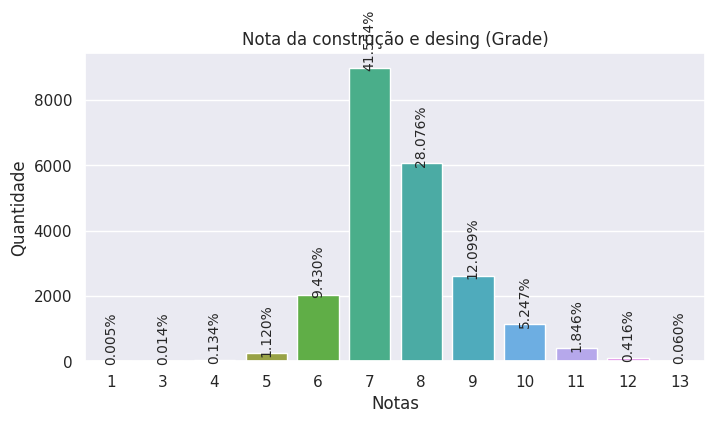

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.countplot(x='grade', data=sales)
total = len(sales['grade'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1,
            f'{height / total:.3%}',
            ha="center",fontsize=10, rotation=90)
# Adiciona rótulos aos eixos
plt.title('Nota da construção e desing (Grade)')
plt.xlabel('Notas')
plt.ylabel('Quantidade')
plt.savefig('grafico_Grade_porcentagens.png', bbox_inches='tight')
# Exibe o gráfico
plt.show()

Possível ver que não existem notas em 1 e 3 e que a maioria está com nota 7 e 8 que são notas médias, segundo legenda do dataset.
Para melhor visualização será feito um gráfico com intervalo de notas

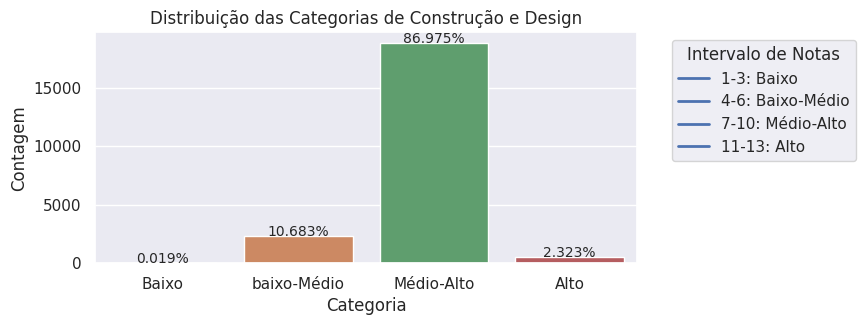

In [ ]:
categorias = {
    'Baixo': range(1, 4),
    'baixo-Médio': range(4, 7),
    'Médio-Alto': range(7, 11),
    'Alto': range(11, 14)
}

novo_dataframe = sales.copy()
novo_dataframe['Categoria'] = novo_dataframe['grade'].apply(
    lambda x: next((categoria for categoria, intervalo in categorias.items() if x in intervalo), None)
)

sns.set(rc={'figure.figsize':(7, 3)})

ax = sns.countplot(x='Categoria', data=novo_dataframe , order=['Baixo', 'baixo-Médio', 'Médio-Alto', 'Alto'])

# Adiciona porcentagens em cima das barras
total = len(novo_dataframe['Categoria'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1,
            f'{height / total:.3%}',
            ha="center",fontsize=10)


plt.title('Distribuição das Categorias de Construção e Design')
plt.xlabel('Categoria')
plt.ylabel('Contagem')

rótulos_personalizados = ['1-3: Baixo', '4-6: Baixo-Médio', '7-10: Médio-Alto', '11-13: Alto']
legendas = [plt.Line2D([0], [0], lw=2) for i in range(len(categorias))]
ax.legend(legendas, rótulos_personalizados, title='Intervalo de Notas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('grafico_Grade_categorias_porcentagens.png', bbox_inches='tight')

plt.show()


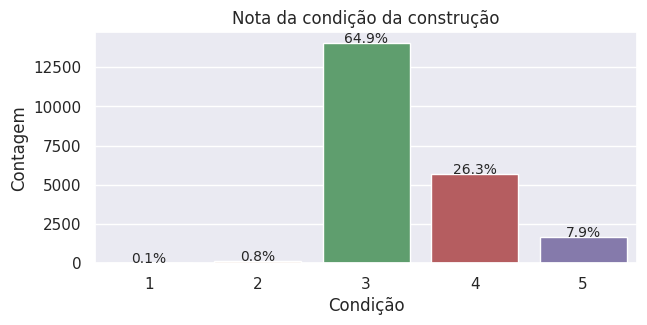

In [ ]:
sns.set(rc={'figure.figsize':(7,3)})
ax = sns.countplot(x='condition', data=sales);
total = len(sales['condition'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1,
            f'{height / total:.1%}',
            ha="center",fontsize=10)
plt.title('Nota da condição da construção')

# Adiciona rótulos aos eixos
plt.xlabel('Condição')
plt.ylabel('Contagem')
plt.savefig('grafico_condicao_porcentagens.png', bbox_inches='tight')
plt.show()

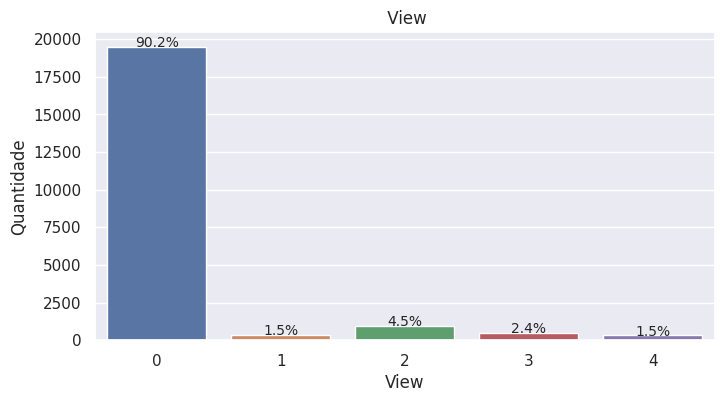

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.countplot(x='view', data=sales)
total = len(sales['view'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1,
            f'{height / total:.1%}',
            ha="center",fontsize=10)
# Adiciona rótulos aos eixos
plt.title(' View')
plt.xlabel('View')
plt.ylabel('Quantidade')
plt.savefig('grafico_view_porcentagens.png', bbox_inches='tight')
# Exibe o gráfico
plt.show()

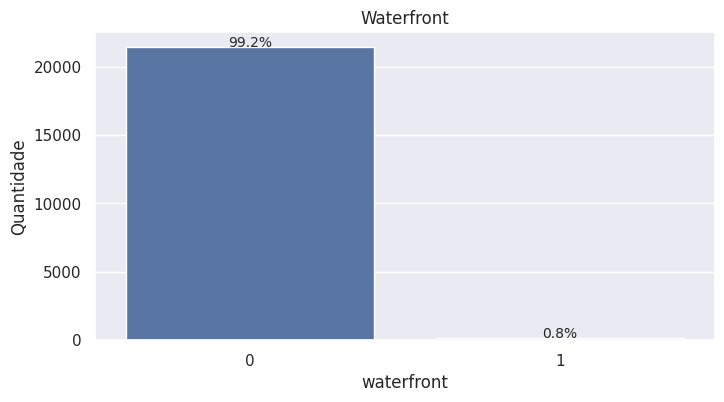

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.countplot(x='waterfront', data=sales)
total = len(sales['waterfront'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1,
            f'{height / total:.1%}',
            ha="center",fontsize=10)
# Adiciona rótulos aos eixos
plt.title('Waterfront')
plt.xlabel('waterfront')
plt.ylabel('Quantidade')
plt.savefig('grafico_waterfront_porcentagens.png', bbox_inches='tight')
# Exibe o gráfico
plt.show()

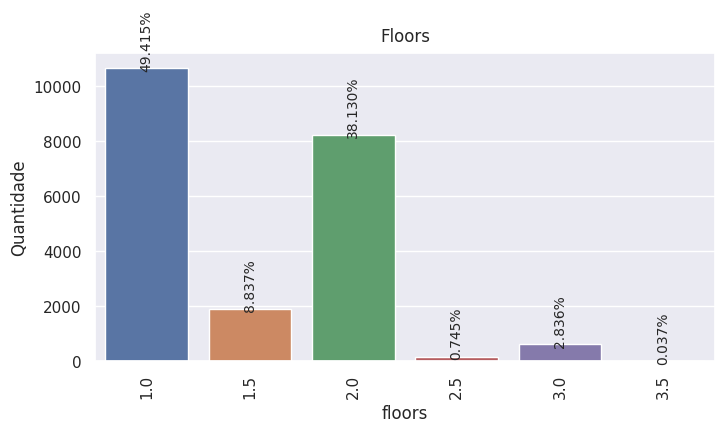

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.countplot(x='floors', data=sales)
total = len(sales['floors'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 1,
            f'{height / total:.3%}',
            ha="center",fontsize=10, rotation = 90)
# Adiciona rótulos aos eixos
plt.title('Floors',y=1.01)
plt.xlabel('floors')
plt.ylabel('Quantidade')
plt.savefig('grafico_floors_porcentagens.png', bbox_inches='tight')

plt.xticks(rotation=90)
# Exibe o gráfico
plt.show()

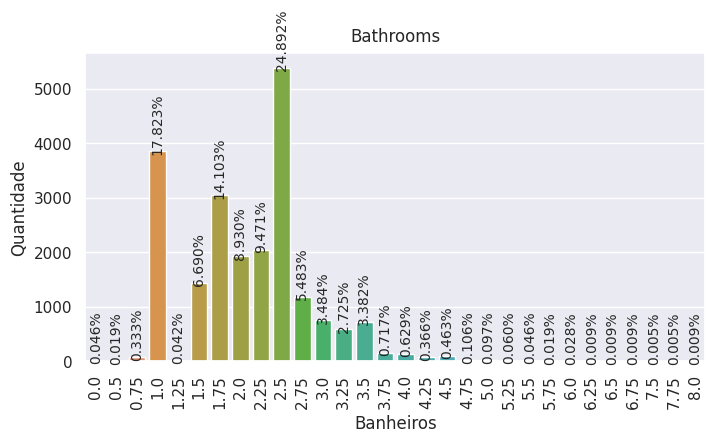

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.countplot(x='bathrooms', data=sales)
total = len(sales['bathrooms'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 1,
            f'{height / total:.3%}',
            ha="center",fontsize=10, rotation = 90)
# Adiciona rótulos aos eixos
plt.title('Bathrooms',y=1.01)
plt.xlabel('Banheiros')
plt.ylabel('Quantidade')
plt.savefig('grafico_bathrooms2_porcentagens.png', bbox_inches='tight')

plt.xticks(rotation=90)
# Exibe o gráfico
plt.show()

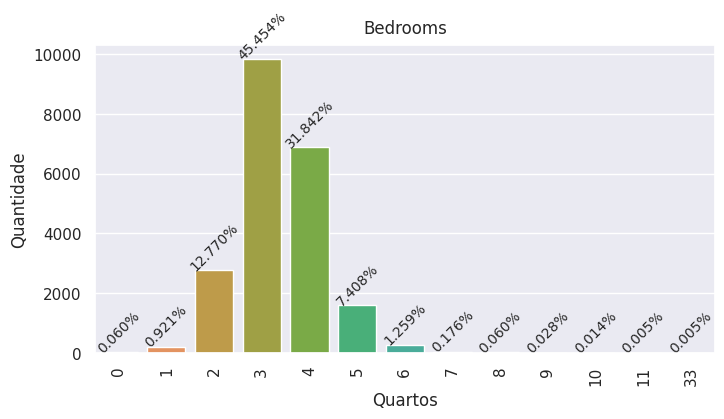

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.countplot(x='bedrooms', data=sales)
total = len(sales['bedrooms'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 1,
            f'{height / total:.3%}',
            ha="center",fontsize=10, rotation = 45)
# Adiciona rótulos aos eixos
plt.title('Bedrooms',y=1.01)
plt.xlabel('Quartos')
plt.ylabel('Quantidade')
plt.savefig('grafico_bedrooms_porcentagens.png', bbox_inches='tight')

plt.xticks(rotation=90)
# Exibe o gráfico
plt.show()

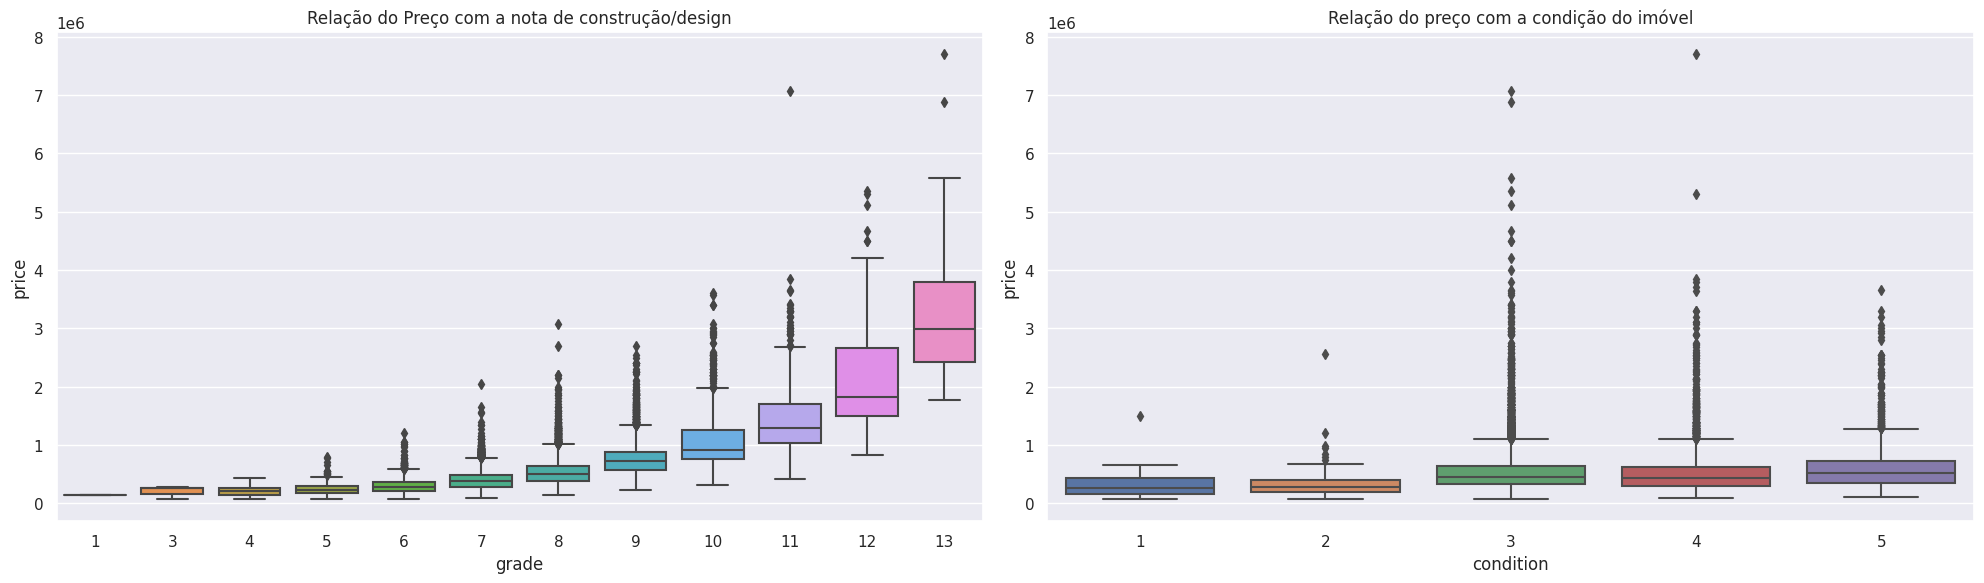

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.boxplot(x='grade', y='price', data=sales, ax=axes[0])
axes[0].set_title('Relação do Preço com a nota de construção/design')
sns.boxplot(x='condition', y='price', data=sales, ax=axes[1])
axes[1].set_title('Relação do preço com a condição do imóvel')
plt.tight_layout()

plt.show()


Os maiores preços estão nas casas com maiores notas de construção e design, o mesmo ocorreu com a condição, mas na condição 3 existem os maiores valores, apesar da média ser mais baixa

In [ ]:
#quantidade de imóveis com e sem vista para o mar
sales["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [ ]:
sales["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

#### Matriz correlação (apenas das maiores de 0.5 ou menores que -0,5)

<ipython-input-10-5a07038b0890>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacao = sales.corr()


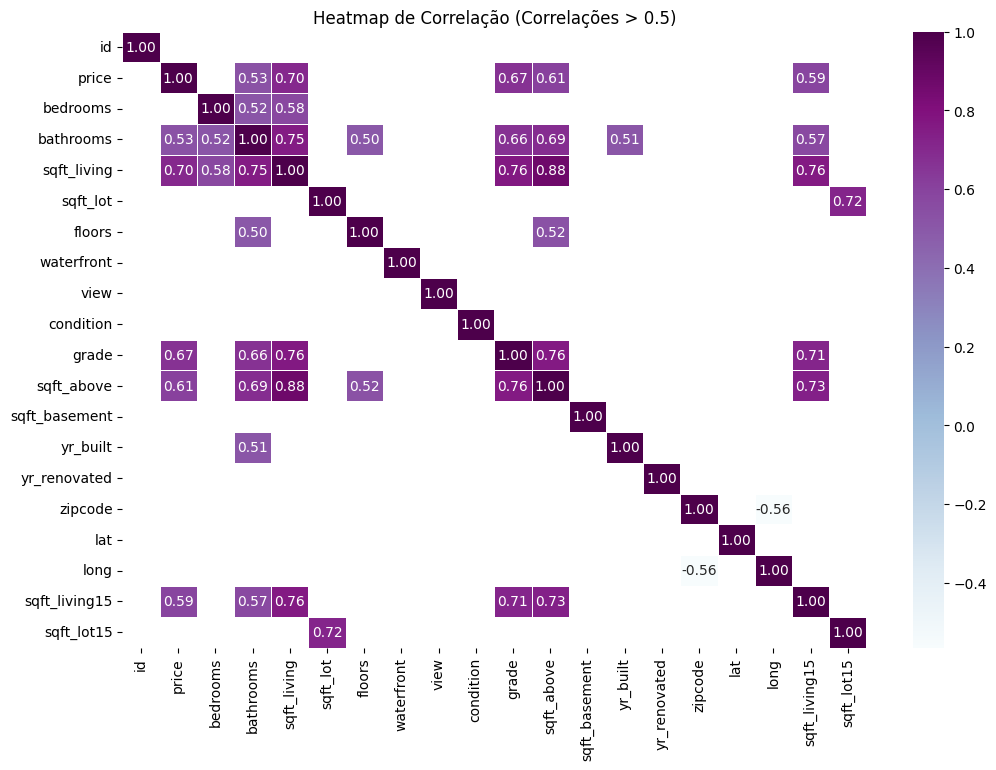

In [10]:
matriz_correlacao = sales.corr()

# Filtra as correlações maiores que 0.5
correlacoes_filtradas = matriz_correlacao[(matriz_correlacao > 0.5) | (matriz_correlacao < -0.5)]
# Cria um mapa de calor com as correlações filtradas
plt.figure(figsize=(12, 8))
sns.heatmap(correlacoes_filtradas, annot=True, cmap='BuPu', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlação (Correlações > 0.5)')
plt.show()

In [ ]:
colunas = sales.columns.tolist()
colunas

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'data_formatada']

In [ ]:
colunas_drop = sales.columns.tolist()
colunas_drop.remove('yr_renovated')
colunas_drop.remove('lat')
colunas_drop.remove('long')
colunas_drop.remove('id')


In [ ]:
colunas_drop.remove('data_formatada')

o yr_renovated foi retirado devido aos zeros, mais abaixo será feito um histograma onde esses valores serão retirados e assim o histograma será coerente. O lat e long também foram retirados, pois não faria sentido olhar o histograma dessas variáveis

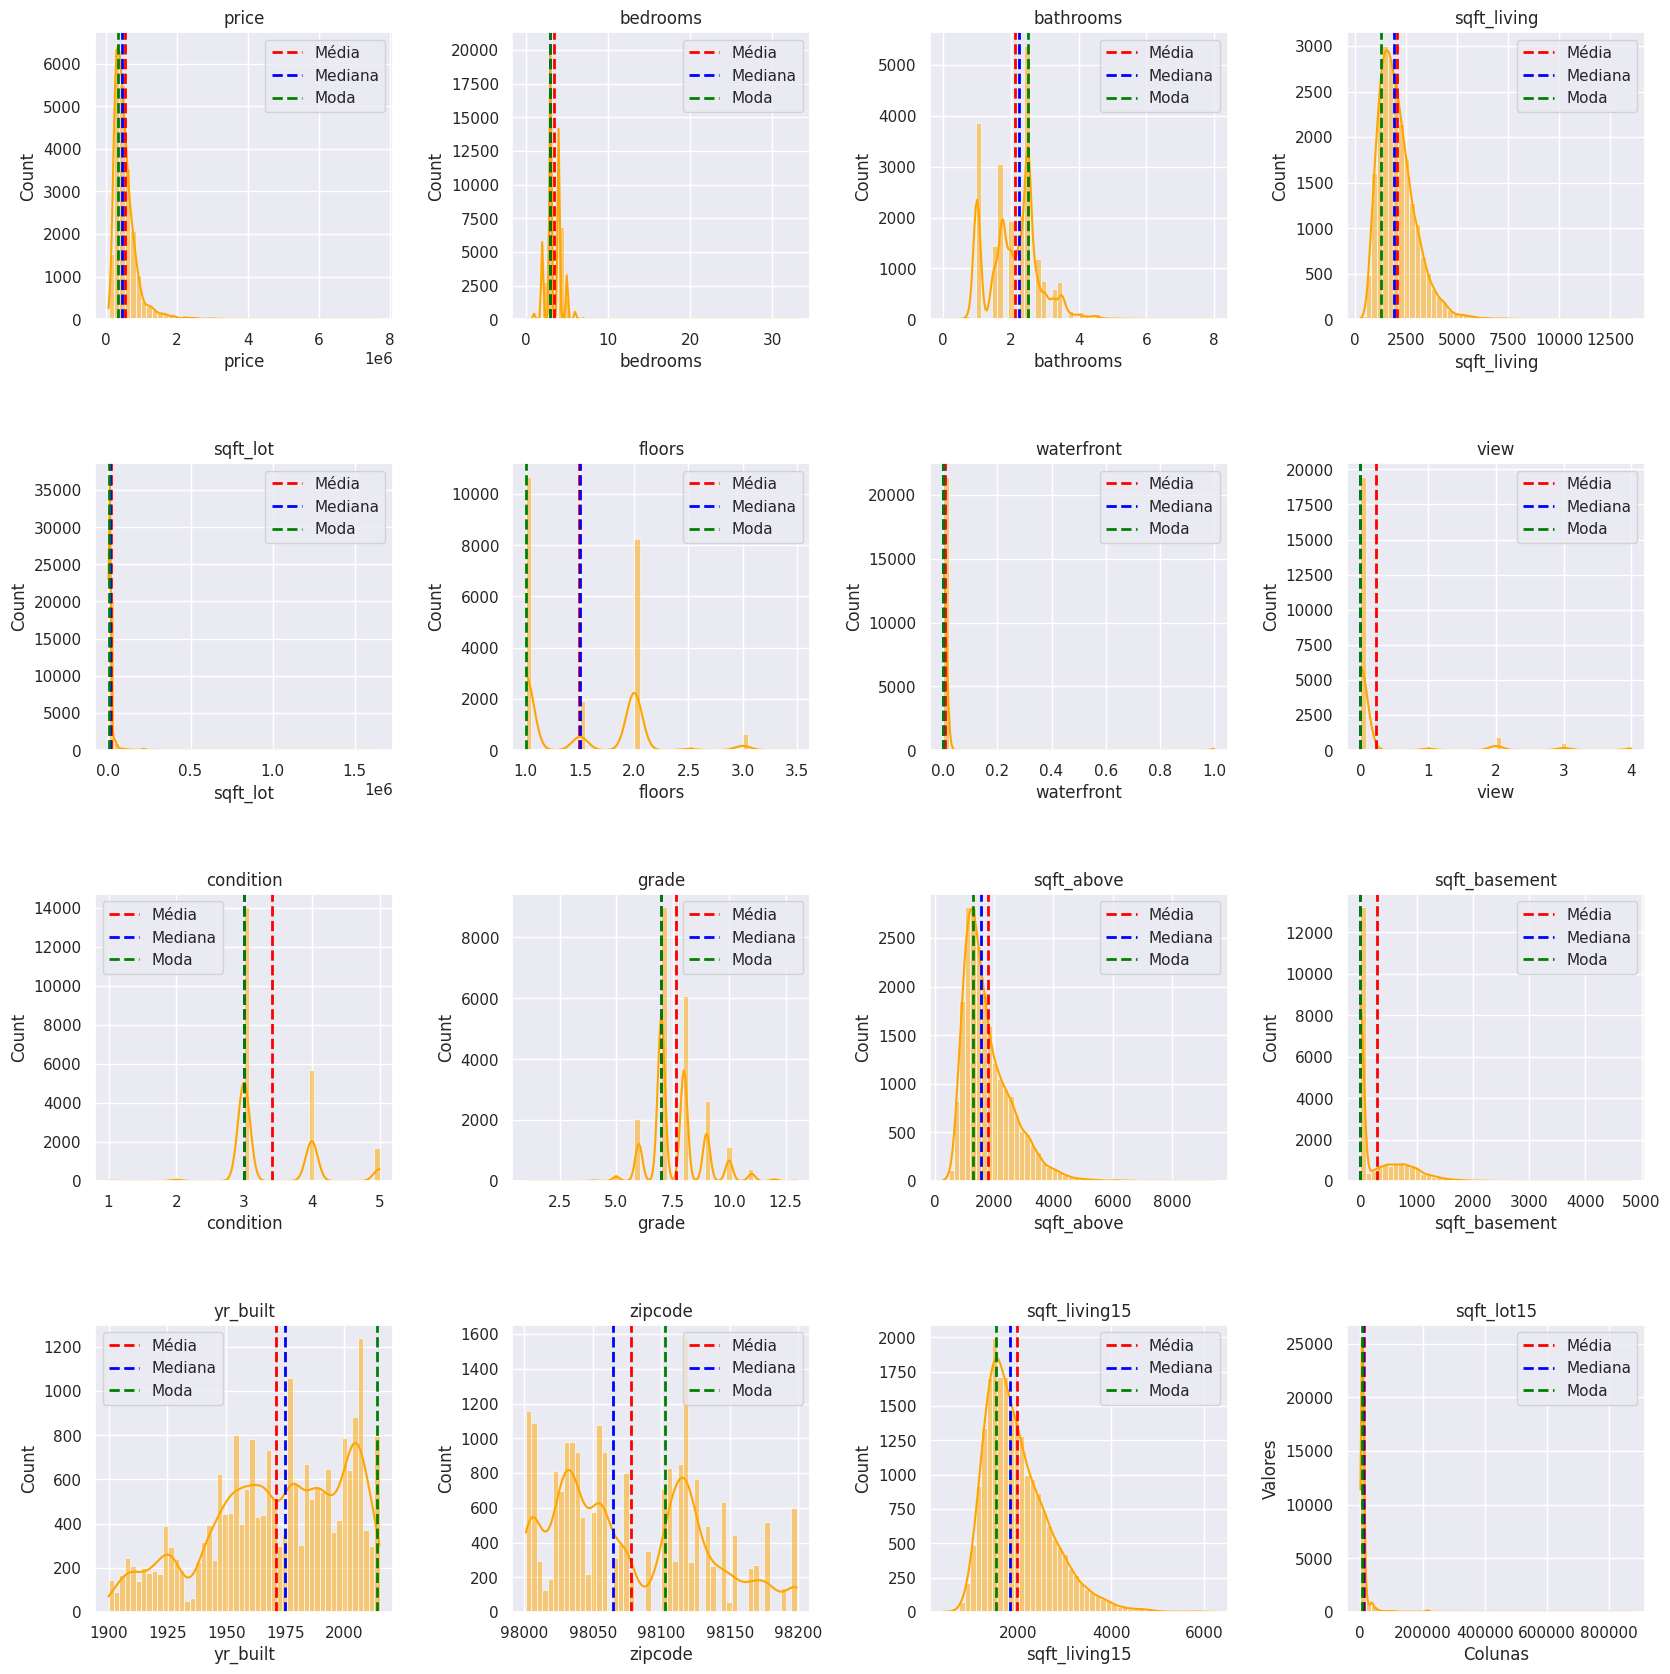

In [ ]:

# Configuração dos subplots em 4 por linha
num_linhas = (len(colunas_drop) + 3) // 4  # Arredonda para cima
num_colunas = 4

# Criando subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(20, 5 * num_linhas))

# Loop para criar boxplots em cada subplot
for i, col in enumerate(colunas_drop):
    row = i // num_colunas
    coluna = i % num_colunas
    sns.histplot(sales[col], bins=50, kde=True, ax=axs[row, coluna], color='orange')
    # Adicione linha vertical para a média
    mean_value = sales[col].mean()
    axs[row, coluna].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Média')

    # Adicione linha vertical para a mediana
    median_value = sales[col].median()
    axs[row, coluna].axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Mediana')

    mode_value = sales[col].mode().iloc[0]  # Pode haver mais de uma moda, escolha a primeira
    axs[row, coluna].axvline(mode_value, color='green', linestyle='dashed', linewidth=2, label='Moda')

    axs[row, coluna].set_title(col)
    axs[row, coluna].legend()


# Adiciona espaço entre os subplots
plt.subplots_adjust(top=0.9, hspace=0.5, wspace=0.4)

# Adiciona rótulos para os eixos
plt.xlabel('Colunas')
plt.ylabel('Valores')

# Exibe os gráficos
plt.show()


Outros gráficos:

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


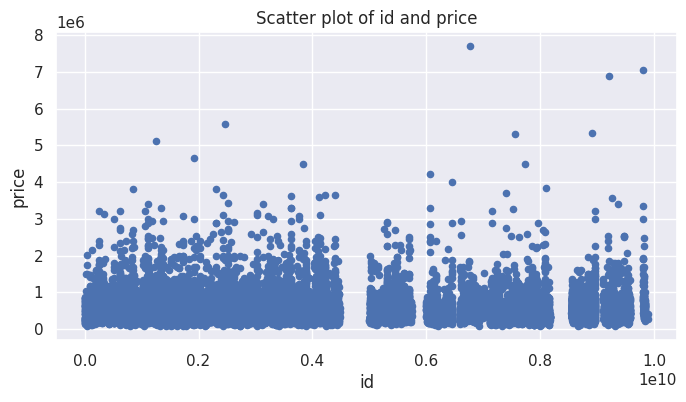

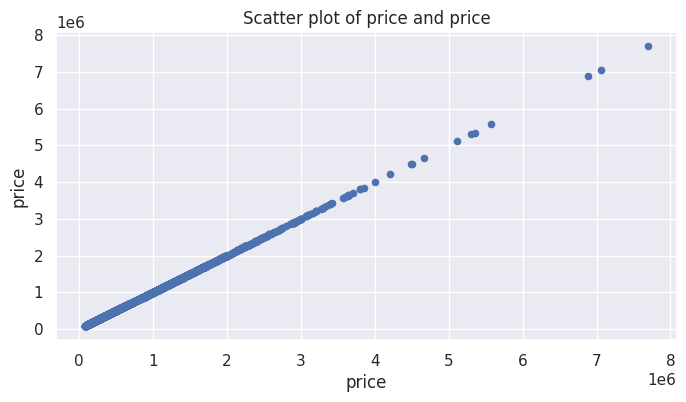

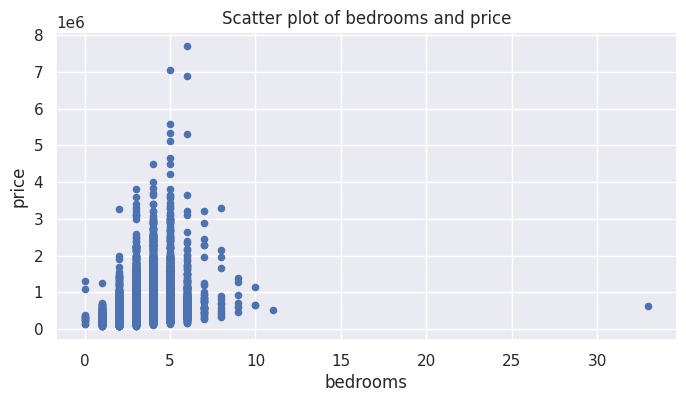

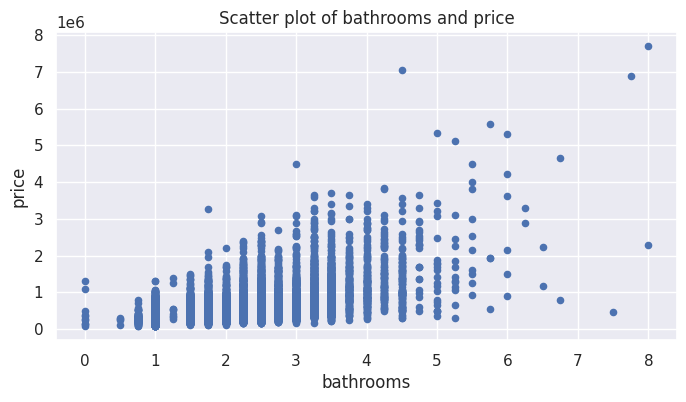

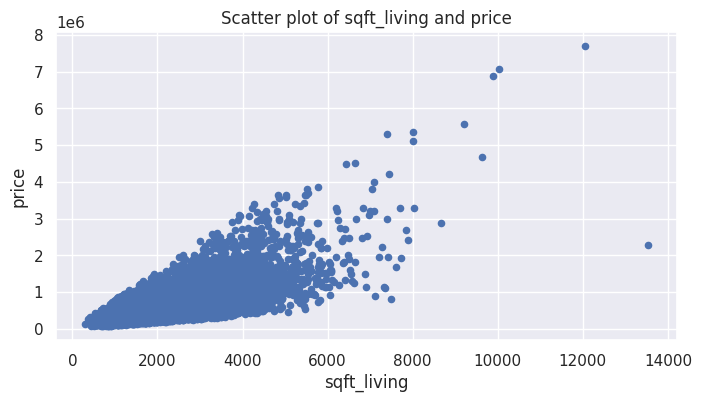

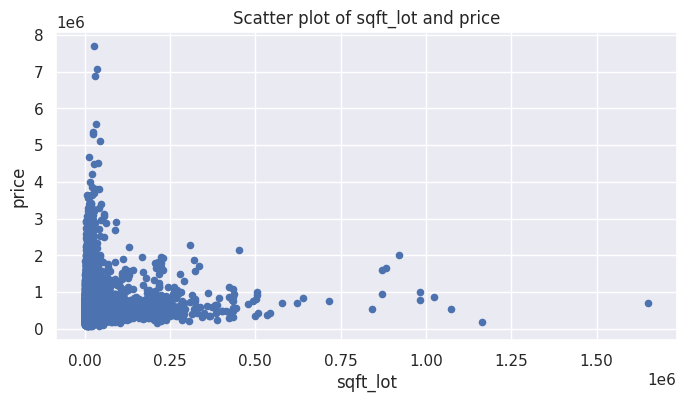

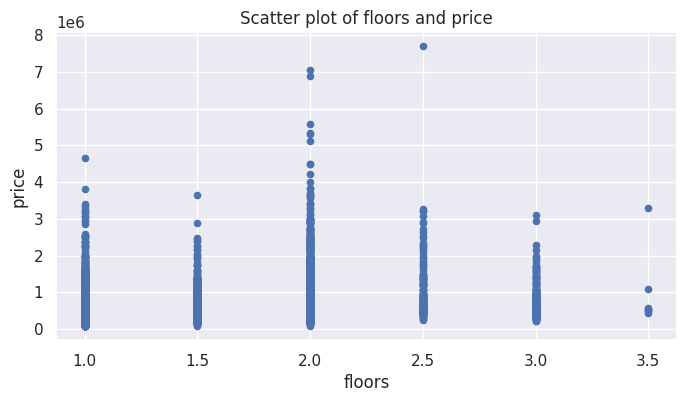

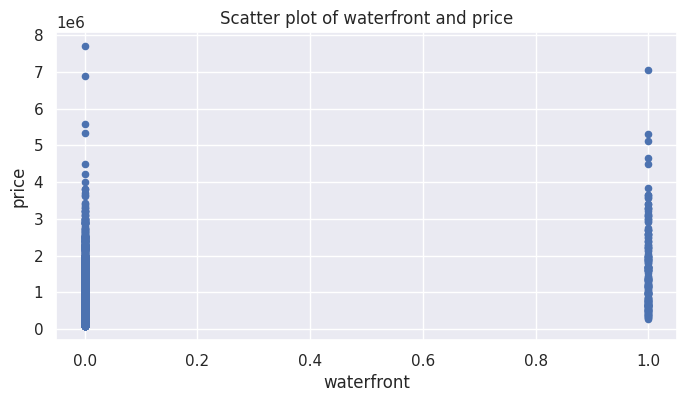

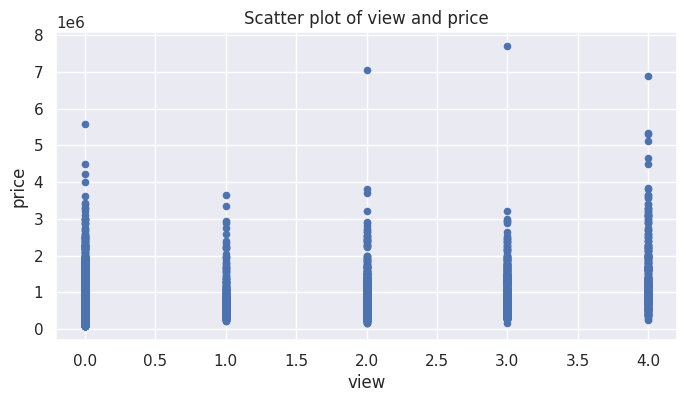

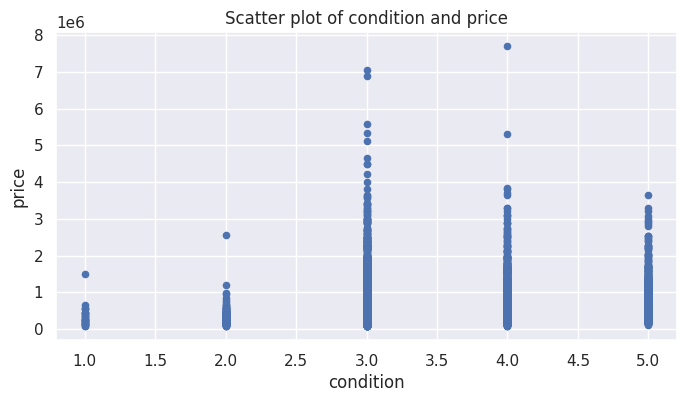

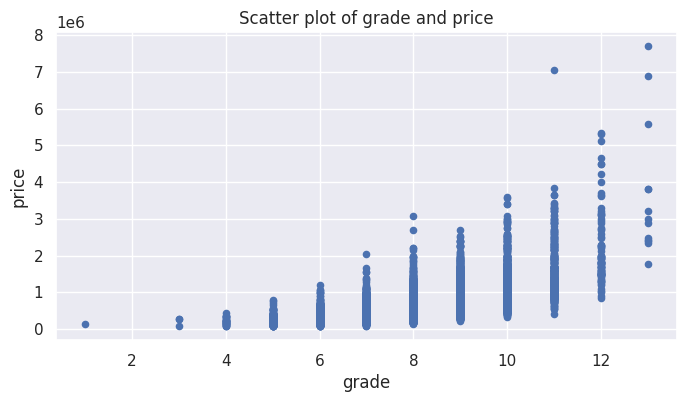

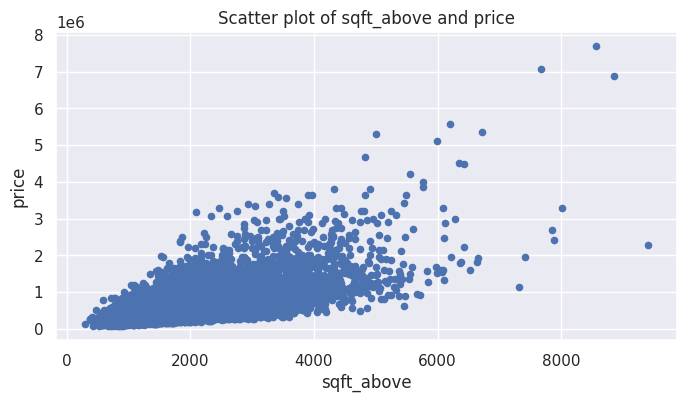

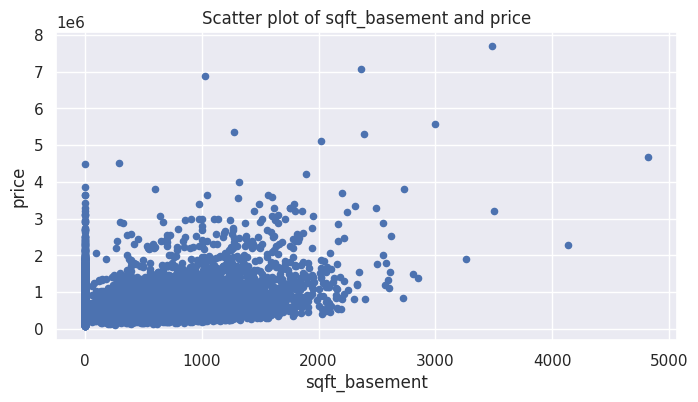

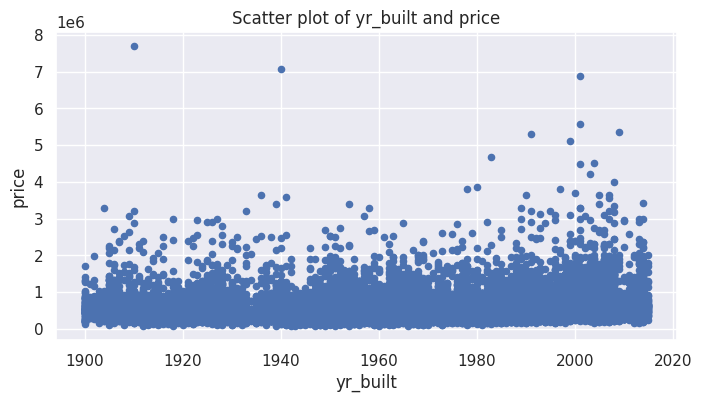

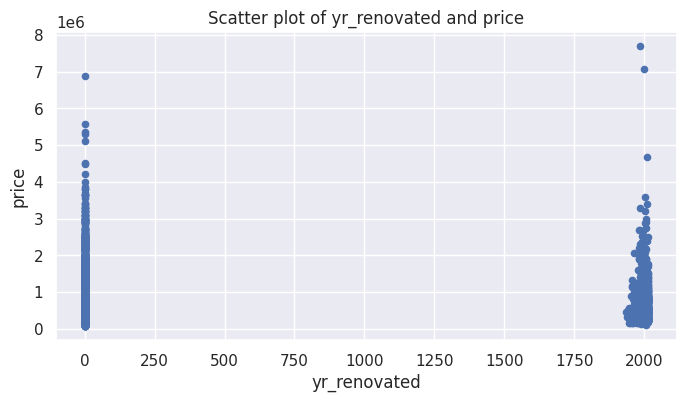

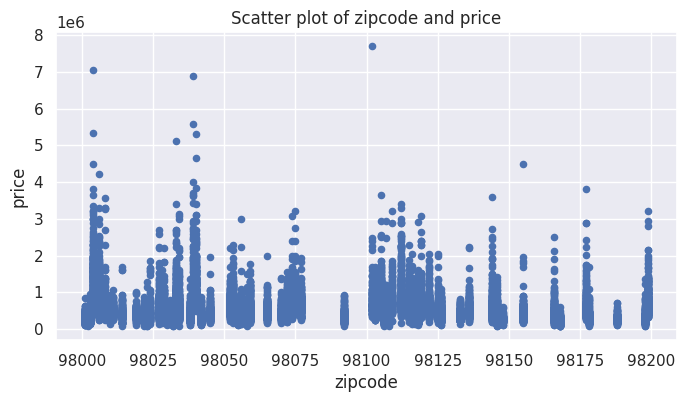

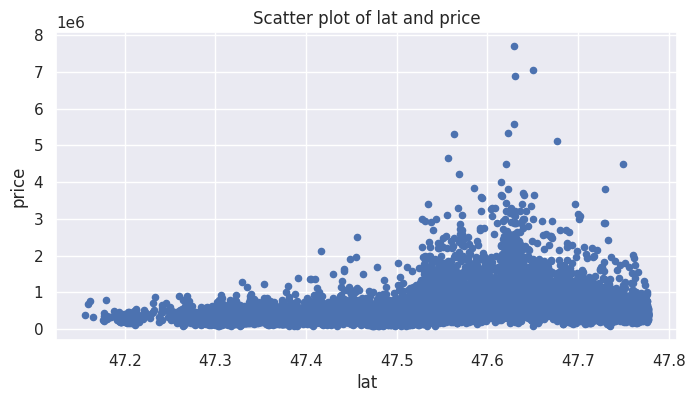

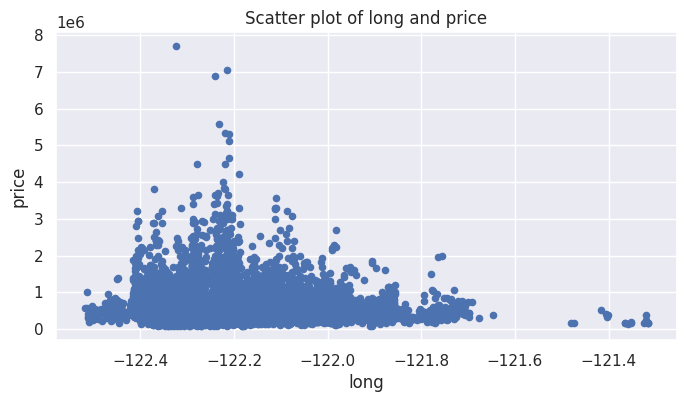

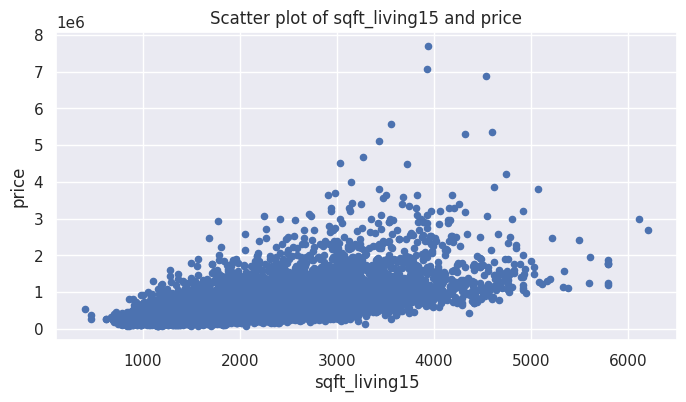

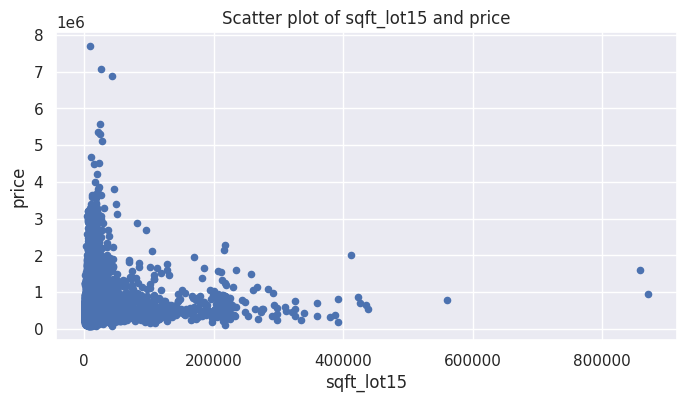

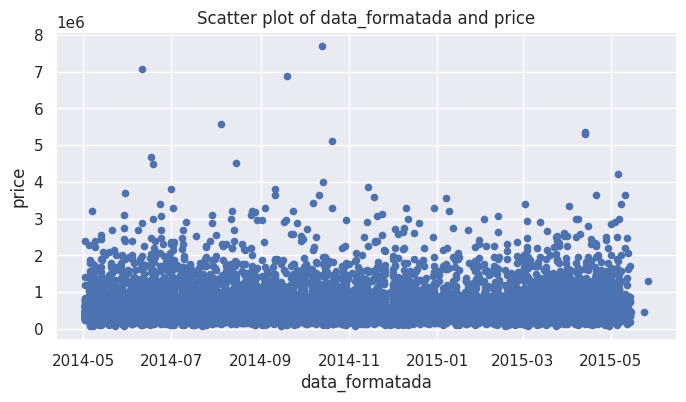

In [ ]:
for col in sales[colunas]:
    sales.plot.scatter(x=col, y='price', title= 'Scatter plot of ' + col + ' and price');

#### Boxplot de todas as variáveis

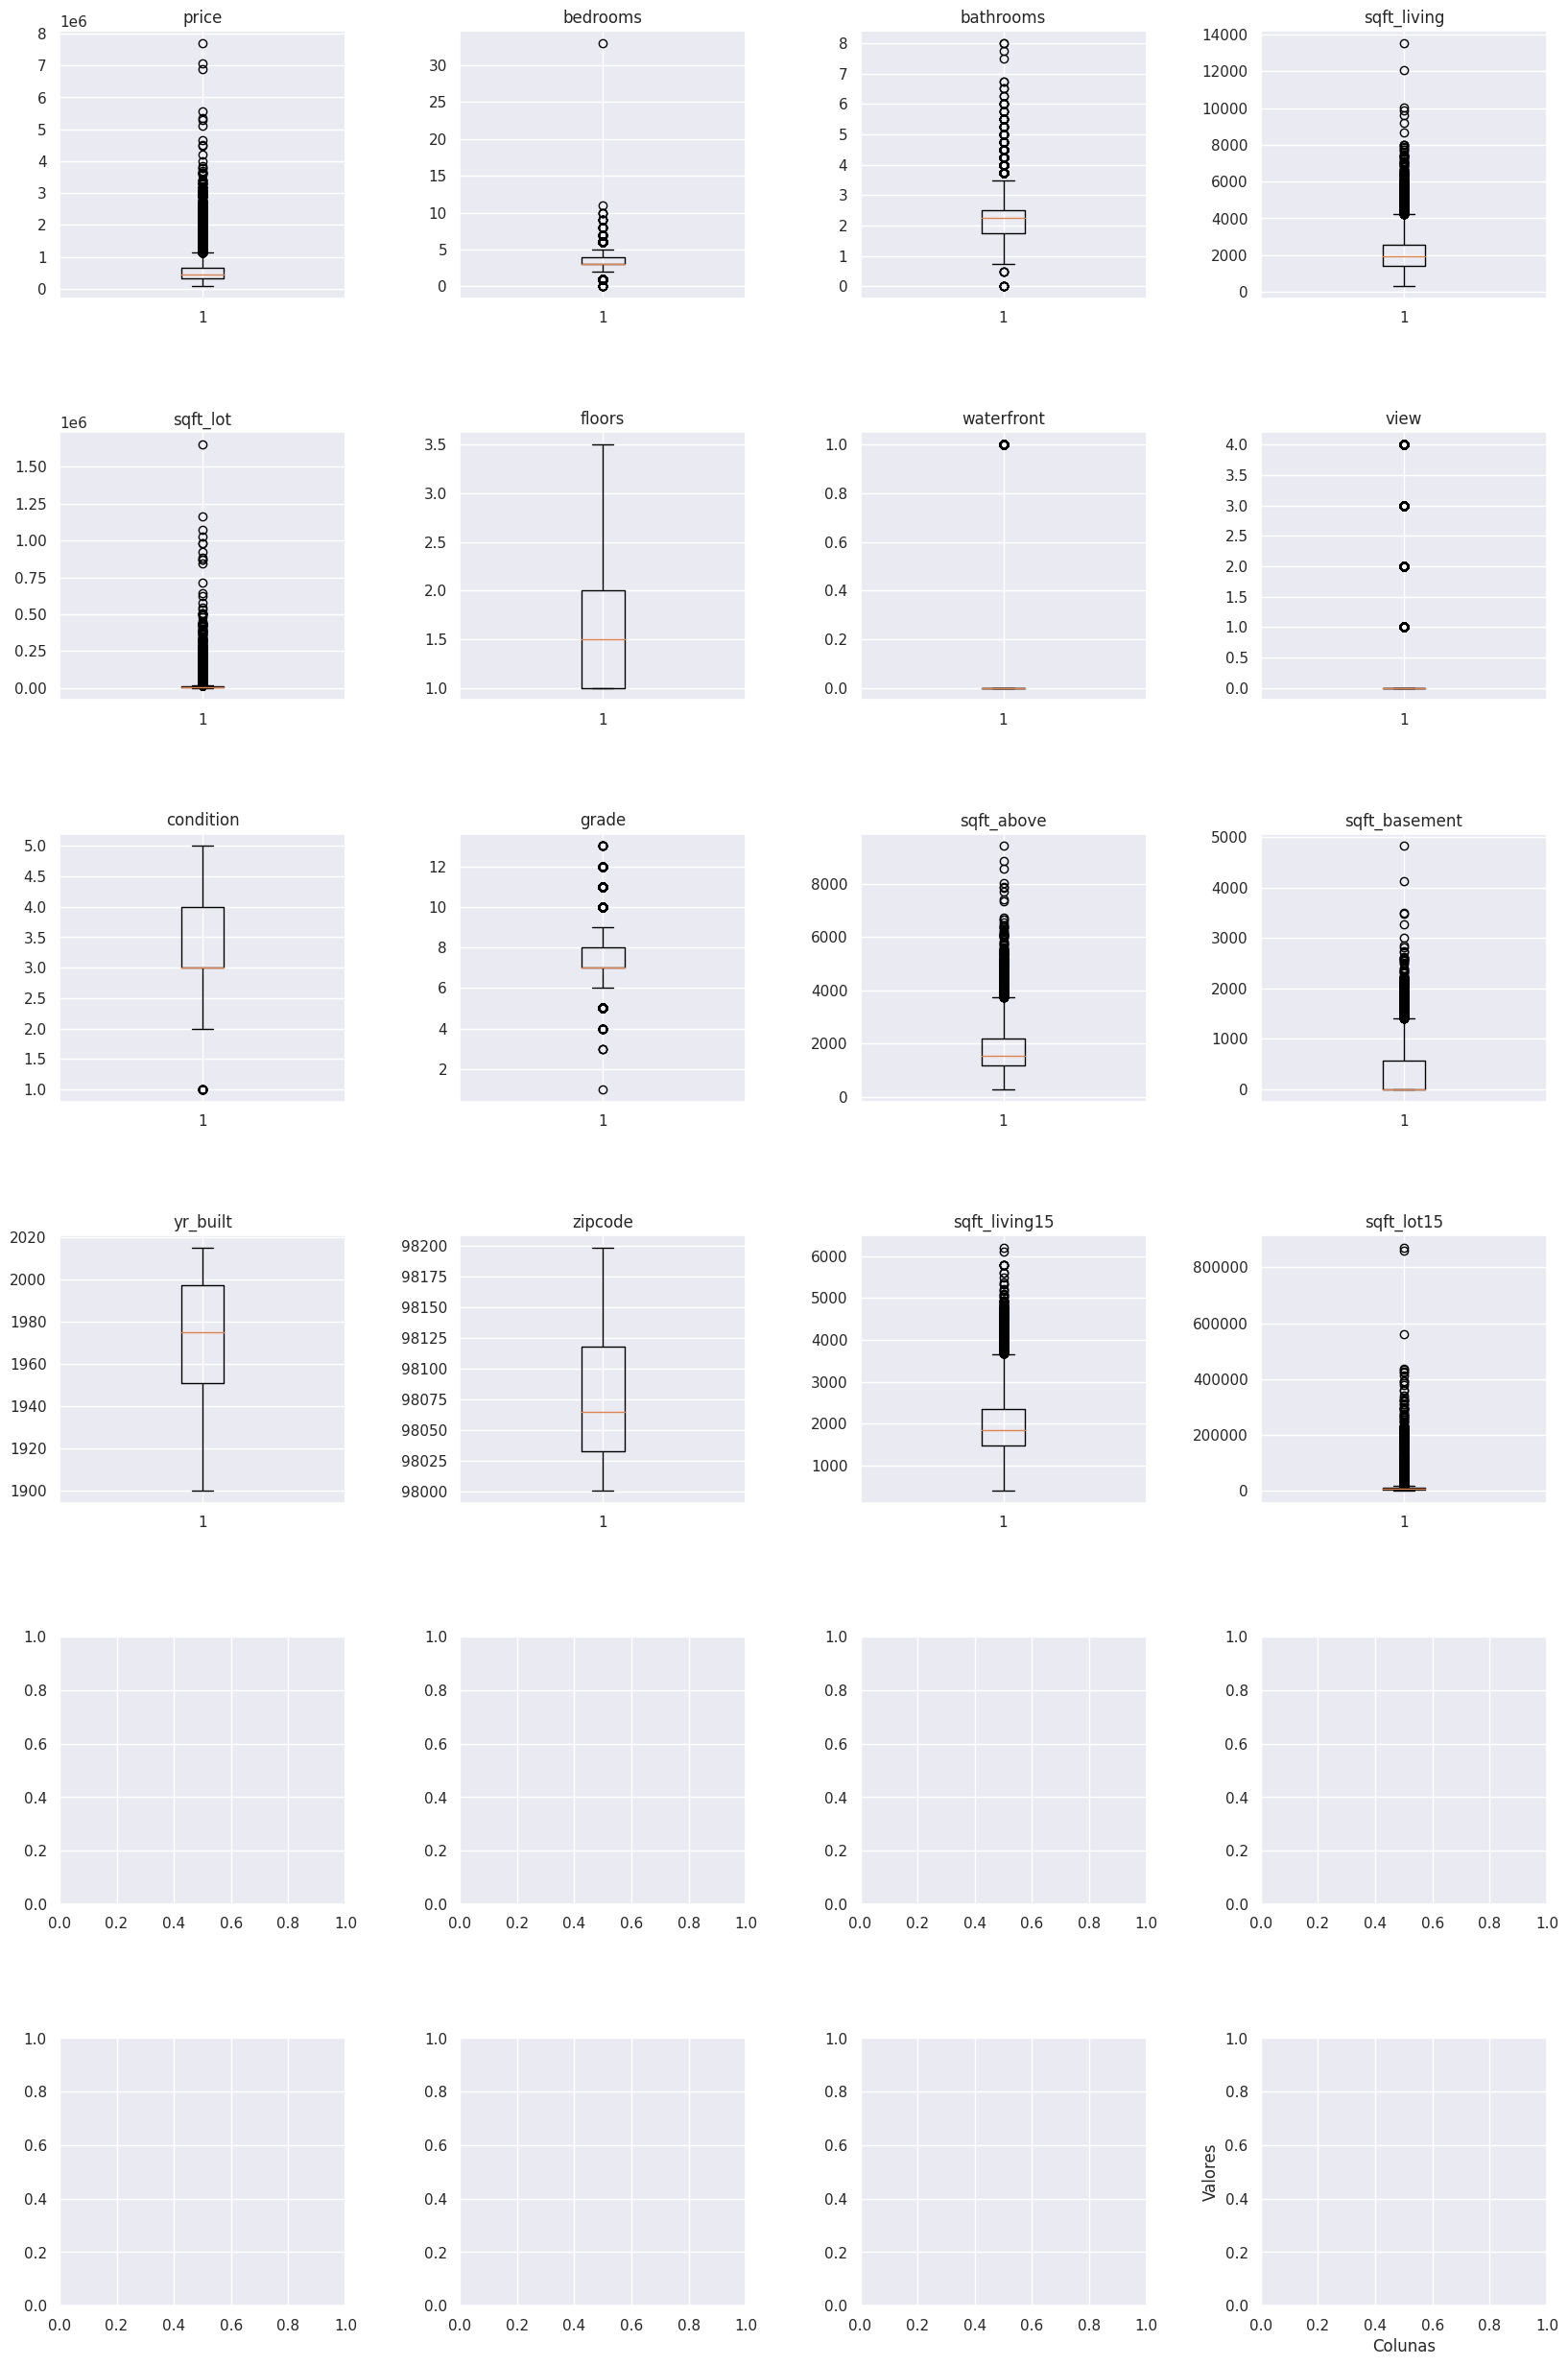

In [ ]:
# Configuração dos subplots em 4 por linha
num_linhas = (len(colunas) + 3) // 4  # Arredonda para cima
num_colunas = 4

# Criando subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(20, 5 * num_linhas))

# Loop para criar boxplots em cada subplot
for i, col in enumerate(colunas_drop):
    row = i // num_colunas
    coluna = i % num_colunas
    axs[row, coluna].boxplot(sales[col])
    axs[row, coluna].set_title(col)

# Adiciona espaço entre os subplots
plt.subplots_adjust(top=0.9, hspace=0.5, wspace=0.4)

# Adiciona rótulos para os eixos
plt.xlabel('Colunas')
plt.ylabel('Valores')

# Exibe os gráficos
plt.show()

## Tratamento de outliars
**As variáveis com valores muito destoantes, que podem influenciar o modelo sao: bedroomns, price, sqft_lot, yr_renovated e sqft_lot15**

Conforme os gráficos, a quantidade de quartos = 33, é um outlier que parece ser devido erro, por ser um valor muito alto e o preço da casa não ser dos maiores. Pela tabela abaixo, é possível ver que a área da casa é pequena, não bate com ter 33 quartos. Por isso esse valor será substituido pela mediana

In [ ]:
filtro_33_quartos = sales['bedrooms'] >32
sales[filtro_33_quartos]

In [ ]:
mediana_quartos = sales['bedrooms'].median()
sales.loc[sales['bedrooms'] == 33, 'bedrooms'] = mediana_quartos

## Gráficos com a Latitude e longitude

<Axes: title={'center': ' yr_built por localização'}, xlabel='long', ylabel='lat'>

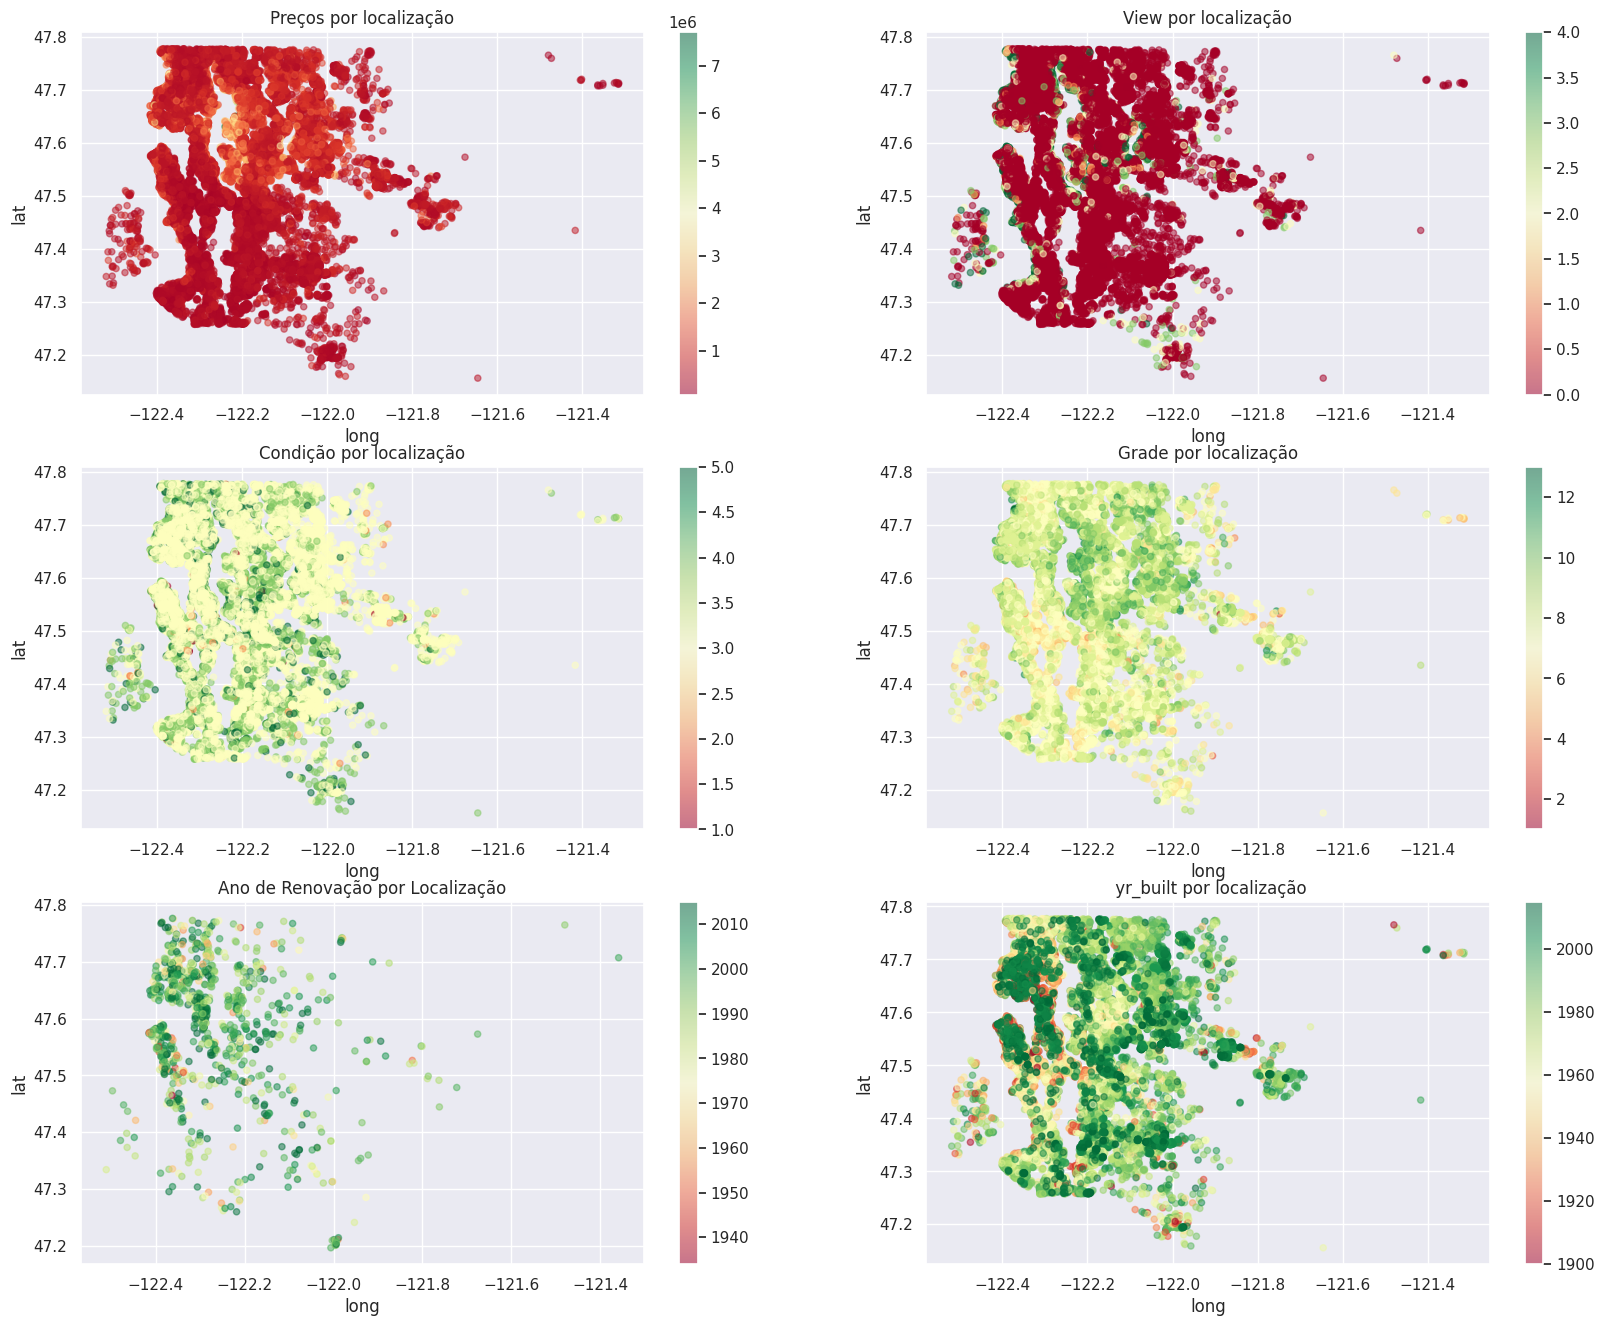

In [ ]:
fig, ax=plt.subplots(3,2, figsize=(20,16))
sales.plot.scatter(y='lat',x='long',c=sales['price'],cmap ='RdYlGn',
                   alpha=0.5,title = "Preços por localização",ax=ax[0,0])

sales.plot.scatter(y='lat',x='long',c=sales['view'],cmap ='RdYlGn',
                   alpha=0.5,title = "View por localização",ax=ax[0,1])
sales.plot.scatter(y='lat',x='long',c=sales['condition'],cmap ='RdYlGn',
                   alpha=0.5,title = "Condição por localização",ax=ax[1,0])
sales.plot.scatter(y='lat',x='long',c=sales['grade'],cmap ='RdYlGn',
                   alpha=0.5,title = "Grade por localização",ax=ax[1,1])
filtered_sales = sales[sales['yr_renovated'] != 0]
filtered_sales.plot.scatter(x='long', y='lat', c=filtered_sales['yr_renovated'],
                            cmap='RdYlGn', alpha=0.5, title="Ano de Renovação por Localização", ax=ax[2,0])
sales.plot.scatter(y='lat',x='long',c=sales['yr_built'],cmap ='RdYlGn',
                   alpha=0.5,title = " yr_built por localização",ax=ax[2,1])

<Axes: title={'center': 'Vista para o mar existente por localização'}, xlabel='long', ylabel='lat'>

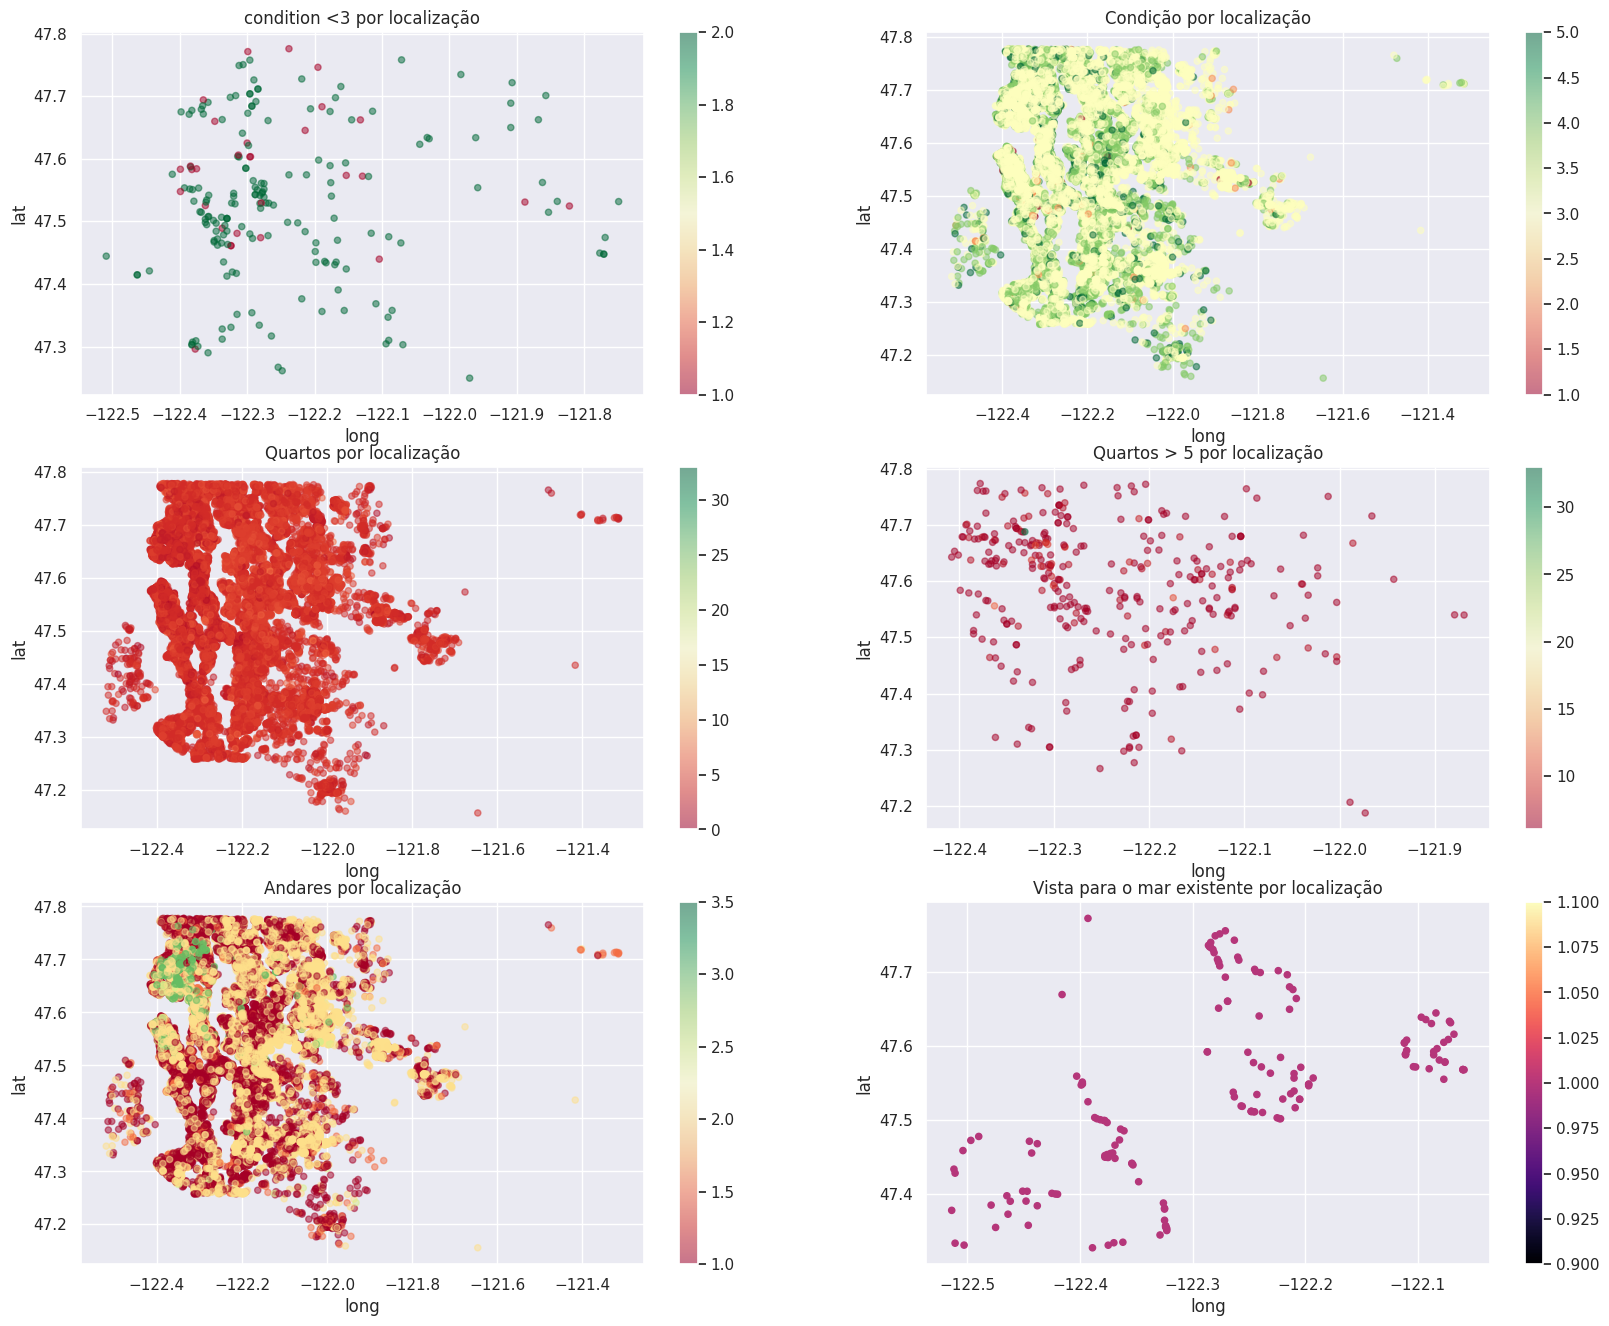

In [ ]:
fig, ax=plt.subplots(3,2, figsize=(20,16))
# sales.plot.scatter(y='lat',x='long',c=sales['view'],cmap ='RdYlGn',
#                    alpha=0.5,title = "View por localização",ax=ax[0,0])

# filtered_view = sales[sales['view'] > 2]
# filtered_view.plot.scatter(x='long', y='lat', c=filtered_view['view'],cmap ='RdYlGn',
#                             alpha=0.5,title = "View > 2 por localização",ax=ax[0,1])

filtered_c = sales[sales['condition'] <3]
filtered_c.plot.scatter(x='long', y='lat', c=filtered_c['condition'],cmap ='RdYlGn',
                            alpha=0.5,title = "condition <3 por localização",ax=ax[0,0])
sales.plot.scatter(y='lat',x='long',c=sales['condition'],cmap ='RdYlGn',
                   alpha=0.5,title = "Condição por localização",ax=ax[0,1])
# sales.plot.scatter(y='lat',x='long',c=sales['grade'],cmap ='RdYlGn',
#                    alpha=0.5,title = "Grade por localização",ax=ax[1,1])


# sales.plot.scatter(y='lat',x='long',c=sales['bathrooms'],cmap ='RdYlGn',
#                    alpha=0.5,title = "Banheiros por localização",ax=ax[0,0])

# filtered_bath = sales[sales['bathrooms'] > 5]
# filtered_bath.plot.scatter(x='long', y='lat', c=filtered_bath['bathrooms'],cmap ='RdYlGn',
#                             alpha=0.5,title = "Banheiros > 5 por localização",ax=ax[0,1])


sales.plot.scatter(y='lat',x='long',c=sales['bedrooms'],cmap ='RdYlGn',
                   alpha=0.5,title = "Quartos por localização",ax=ax[1,0])
filtered_bed = sales[sales['bedrooms'] > 5]
filtered_bed.plot.scatter(x='long', y='lat', c=filtered_bed['bedrooms'], cmap ='RdYlGn',
                    alpha=0.5,title = "Quartos > 5 por localização",ax=ax[1,1])

sales.plot.scatter(y='lat',x='long',c=sales['floors'], cmap ='RdYlGn',alpha=0.5,
                   title = "Andares por localização",ax=ax[2,0])

filtered_waterfront = sales[sales['waterfront'] !=0]

filtered_waterfront.plot.scatter(y='lat',x='long',c=filtered_waterfront['waterfront'],cmap ='magma'
                   ,title = "Vista para o mar existente por localização",ax=ax[2,1])

